# 고객 세분화 & 만족도 EDA

*   0-9세 데이터는 제외, 총 119558개 데이터

*   연령(6) * 고객타입(2) * 여행목적(2) * 클래스(3) = 72개 그룹
#10개 그룹을 선택한 이유? -> 전체이용객 비율 60%  -> 주요 고객층
#분류 기준? -> satisfaction과 상관계수를 봤을때 0.1 이상. 의미있는 지표




# 데이터 로드 및 함수

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np

# uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['airline_passenger_satisfaction(age_group).csv']))

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['airline_passenger_satisfaction(age_group).csv']))

In [ ]:
# Gender 열의 값을 숫자로 변환
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})

# Customer Type 열의 값을 숫자로 변환
data['Customer_Type'] = data['Customer_Type'].replace({'Loyal': 1, 'disloyal': 0})

# Type of Travel 열의 값을 숫자로 변환
data['Type_of_Travel'] = data['Type_of_Travel'].replace({'P': 0, 'B': 1})

# Class 열의 값을 숫자로 변환
data['Class'] = data['Class'].replace({'Business': 2, 'Eco': 1, 'Eco Plus': 0})

# age_group 범주 값 숫자로 변환
data['age_group'] = data['age_group'].replace({'10~19': 0, '20~29': 1, '30~39': 2, '40~49':3, '50~59':4, '60+':5})

#satisfaction 변환
data['satisfaction'] = data['satisfaction'].replace({'D': 0, 'S': 1})

# 변환된 데이터 확인
print(data.head())

   id  Gender  age_group  Customer_Type  Type_of_Travel  Class  \
0   1       1          3              0               1      2   
1   2       0          2              1               1      2   
2   3       1          3              1               1      2   
3   4       1          4              1               1      2   
4   5       0          3              1               1      2   

   Flight_Distance  Departure_Delay  Arrival_Delay  Inflight_wifi_service  \
0              821                2              5                      3   
1              821               26             39                      2   
2              853                0              0                      4   
3             1905                0              0                      2   
4             3470                0              1                      3   

   ...  Online_boarding  Seat_comfort  Inflight_entertainment  \
0  ...                3             5                       5   
1  ...    

In [ ]:
#train 데이터 프레임의 기본 정보 확인하기
data[['Gender', 'age_group', 'Flight_Distance', 'Class', 'Customer_Type', 'Type_of_Travel']].describe()

,Gender,age_group,Flight_Distance,Class,Customer_Type,Type_of_Travel
count,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000
mean,0.492606,2.536376,1195.424254,1.413281,0.815529,0.699585
std,0.499947,1.439163,1001.470050,0.621016,0.387870,0.458440
min,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,414.000000,1.000000,1.000000,0.000000
50%,0.000000,3.000000,846.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,1746.000000,2.000000,1.000000,1.000000
max,1.000000,5.000000,4983.000000,2.000000,1.000000,1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import os

# 디렉토리 생성
output_dir = 'customer_segment_plots'
os.makedirs(output_dir, exist_ok=True)

# 만족도 관련 컬럼들
satisfaction_columns = [
    'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
    'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
    'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
    'Cleanliness', 'Satisfaction'
]

satisfaction_columns_wo_satisfaction = [
    'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
    'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
    'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
    'Cleanliness'
]

#기초 통계 출력 함수
def print_descriptive_statistics(segment, satisfaction_columns):
    stats = segment[satisfaction_columns].describe()
    styled_stats = stats.style.format("{:.2f}")
    display(styled_stats)

# 텍스트 변환 딕셔너리
age_group_dict = {-1: 'Under 10', 0: '10-19', 1: '20-29', 2: '30-39', 3: '40-49', 4: '50-59', 5: '60+'}
customer_type_dict = {0: 'disloyal Customer', 1: 'Loyal Customer'}
type_of_travel_dict = {0: 'Personal Travel', 1: 'Business Travel'}
class_dict = {0: 'Eco Plus', 1: 'Eco', 2: 'Business'}

# 고객 그룹화 및 각 세그먼트 크기 계산
grouped = data.groupby(['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']).size().reset_index(name='Count')

# 상위 10개 그룹 선택
top_10_groups = grouped.sort_values(by='Count', ascending=False).head(10)

In [ ]:
data[satisfaction_columns_wo_satisfaction].describe()

,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
count,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000,119558.000000
mean,2.733544,3.051573,2.761421,2.977241,3.209614,3.265687,3.450334,3.366508,3.385955,3.353912,3.630614,3.306830,3.641521,3.292076
std,1.331810,1.526801,1.402075,1.280317,1.327871,1.347311,1.315514,1.331253,1.288065,1.314640,1.182233,1.265708,1.177587,1.310667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# 고객 세그멘테이션 과정

## 상관 매트릭스


In [ ]:
# 데이터 요약
print(data.describe())
print(data.info())

                  id         Gender      age_group  Customer_Type  \
count  119558.000000  119558.000000  119558.000000  119558.000000   
mean    64928.037756       0.492606       2.536376       0.815529   
std     37500.893276       0.499947       1.439163       0.387870   
min         1.000000       0.000000       0.000000       0.000000   
25%     32409.250000       0.000000       1.000000       1.000000   
50%     64912.500000       0.000000       3.000000       1.000000   
75%     97414.750000       1.000000       4.000000       1.000000   
max    129880.000000       1.000000       5.000000       1.000000   

       Type_of_Travel          Class  Flight_Distance  Departure_Delay  \
count   119558.000000  119558.000000    119558.000000    119558.000000   
mean         0.699585       1.413281      1195.424254        14.672720   
std          0.458440       0.621016      1001.470050        37.784353   
min          0.000000       0.000000        31.000000         0.000000   
25%     

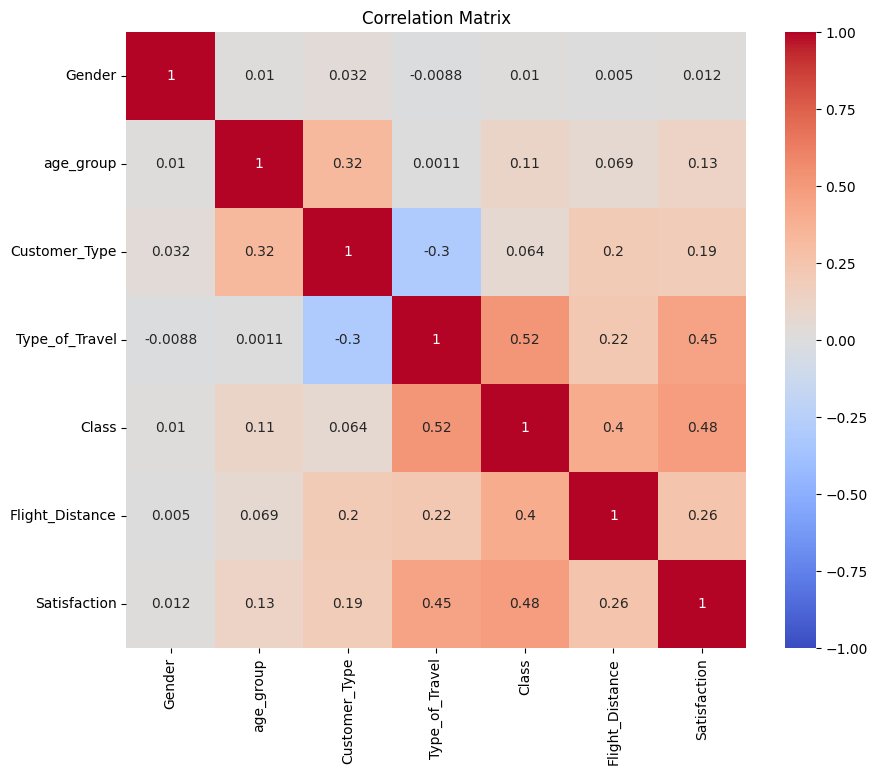

In [ ]:
# 상관계수 매트릭스 계산
corr_matrix = data[['Gender', 'age_group', 'Customer_Type', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Satisfaction']].corr(method='spearman')

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#고객 분류 기준 중에서 성별은 만족도와 관계가 없음을 파악할 수 있다.
#0.0055라는 값은 사실상 상관관계가 없다는 것을 나타냄. 즉, 성별은 고객 만족도에 영향을 미치지 않는다는 결론을 내릴 수 있다.
#Gender는 명목형 변수이며, Satisfaction은 순서형 변수. 이러한 변수 간의 상관관계를 측정할 때는 스피어맨 상관계수를 사용
#실질적 의미: 상관계수 값이 낮을 때는 두 변수 간의 관계가 매우 약하거나 없다. 성별이 고객 만족도에 대한 주요 예측 변수가 아님

## **주성분 분석**

일단 해봤는데 해석 불가,,

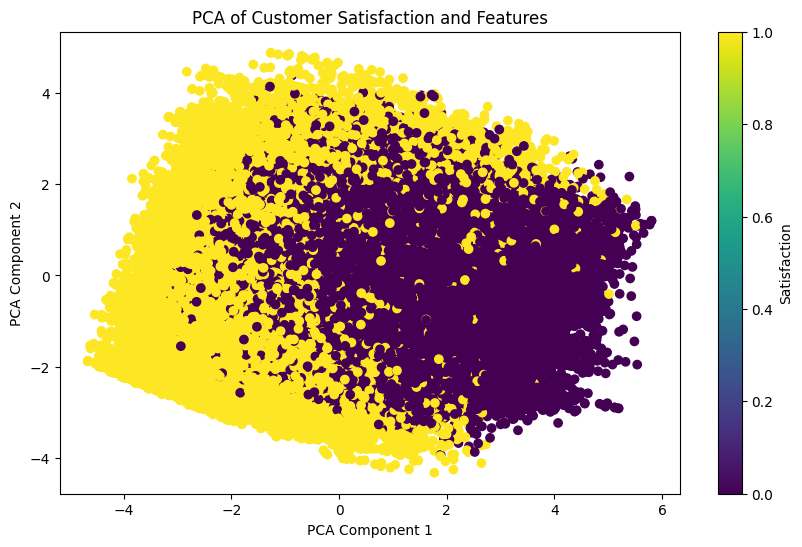

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 각 만족도 항목과 Satisfaction
features = ['Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
            'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
            'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
            'Cleanliness', 'Satisfaction']

# 표준화 (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# PCA 분석
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=data['Satisfaction'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Customer Satisfaction and Features')
plt.colorbar(scatter, label='Satisfaction')
plt.show()

In [ ]:
# 주성분 계수 확인
pca_components = pd.DataFrame(pca.components_, columns=features, index=['PCA Component 1', 'PCA Component 2'])
print(pca_components.to_string())

                 Inflight_wifi_service  Departure_Arrival_time_convenient  Ease_of_Online_booking  Gate_location  Food_and_drink  Online_boarding  Seat_comfort  Inflight_entertainment  Onboard_service  Legroom_service  Baggage_handling  Checkin_service  Inflight_service  Cleanliness  Satisfaction
PCA Component 1              -0.227340                          -0.080523               -0.154715      -0.053619       -0.276938        -0.286987     -0.324004               -0.401037        -0.270535        -0.223253         -0.251235        -0.179131         -0.253973    -0.328803     -0.315124
PCA Component 2              -0.448672                          -0.422750               -0.536410      -0.435499        0.149571        -0.148658      0.146036                0.173883         0.075847         0.019212          0.063628         0.051548          0.070966     0.169114      0.009264


Silhouette Score: 0.9999665258576308


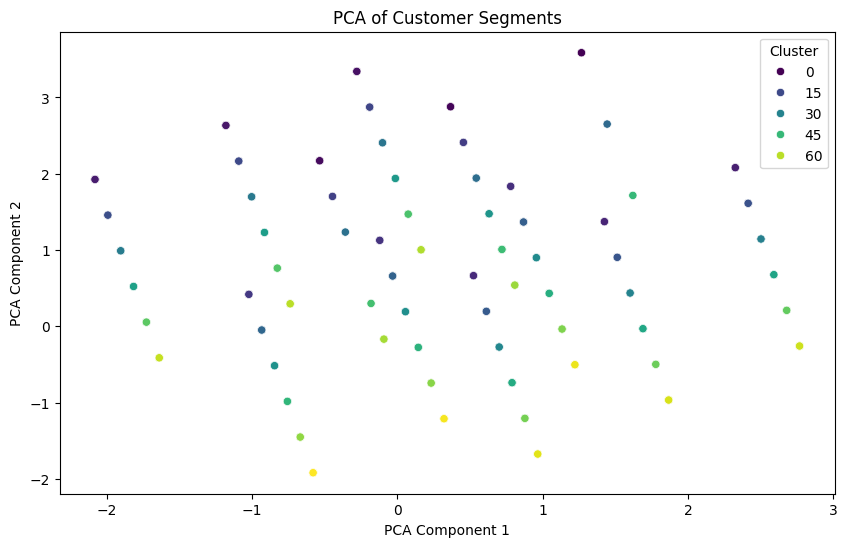

In [ ]:
#연령 ,고객 타입, 여행 목적, 클래스로 나눈 고객 세그먼트의 실루엣 점수
features = ['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']

# 특성 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# 기존 분류 기준에 따라 군집 정의
data['Cluster'] = data[features].astype(str).agg('-'.join, axis=1).astype('category').cat.codes

# 실루엣 점수 계산
score = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {score}')

# PCA 수행 및 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Customer Segments')
plt.show()

ANOVA 수행해서 정의된 고객 세그먼트 간의 satisfaction 차이를 검증함 -> p-value가 0.05보다 낮으면 통계적으로 유의미함

*   F-statistic: 그룹 간 분산이 그룹 내 분산에 비해 얼마나 큰지를 나타냄.
*   p-value: p-값이 0.05보다 작으면, 세그먼트 간 차이가 통계적으로 유의미함.





In [ ]:
from scipy.stats import f_oneway

# 고객 세그먼트 정의
data['Segment'] = data[['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']].astype(str).agg('-'.join, axis=1)

# 각 세그먼트의 만족도 추출
segments = data['Segment'].unique()
satisfaction_values = [data[data['Segment'] == segment]['Satisfaction'] for segment in segments]

#segments
"""
['3-0-1-2' '2-1-1-2' '3-1-1-2' '4-1-1-2' '5-1-1-2' '1-0-1-2' '1-0-1-1'
 '4-1-0-1' '5-1-0-1' '0-1-0-1' '3-1-0-1' '5-1-1-0' '2-0-1-2' '2-1-1-1'
 '3-0-1-1' '5-1-1-1' '4-0-1-1' '5-0-1-1' '2-1-0-1' '1-1-0-1' '2-1-0-0'
 '0-0-1-0' '0-0-1-1' '0-0-1-2' '4-0-1-2' '0-1-1-2' '4-1-0-0' '0-1-0-0'
 '1-1-0-0' '3-1-1-0' '1-1-1-2' '5-0-0-1' '5-1-0-2' '3-1-0-2' '3-1-0-0'
 '3-1-1-1' '2-0-1-1' '4-1-0-2' '1-1-0-2' '2-1-0-2' '0-1-0-2' '5-0-1-2'
 '4-1-1-1' '2-1-1-0' '2-0-1-0' '4-1-1-0' '1-0-1-0' '5-1-0-0' '2-0-0-0'
 '1-1-1-0' '1-1-1-1' '2-0-0-1' '0-1-1-0' '3-0-1-0' '0-0-0-1' '0-1-1-1'
 '5-0-1-0' '4-0-1-0' '4-0-0-1' '1-0-0-1' '2-0-0-2' '0-0-0-2' '3-0-0-1'
 '0-0-0-0' '5-0-0-2' '1-0-0-2' '4-0-0-0' '4-0-0-2']"""

# ANOVA 수행
anova_results = f_oneway(*satisfaction_values)
print(f'ANOVA F-statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}')

# 결과 해석
if anova_results.pvalue < 0.05:
    print("각 세그먼트 간의 만족도 차이가 통계적으로 유의미합니다.")
else:
    print("각 세그먼트 간의 만족도 차이가 통계적으로 유의미하지 않습니다.")

ANOVA F-statistic: 1149.0936540582302, p-value: 0.0
각 세그먼트 간의 만족도 차이가 통계적으로 유의미합니다.


#### X

0         102
1          31
2         108
3         119
4          41
         ... 
119553     41
119554     25
119555     31
119556     27
119557      6
Name: Cluster, Length: 119558, dtype: int16
Silhouette Score: -0.05379452768610595


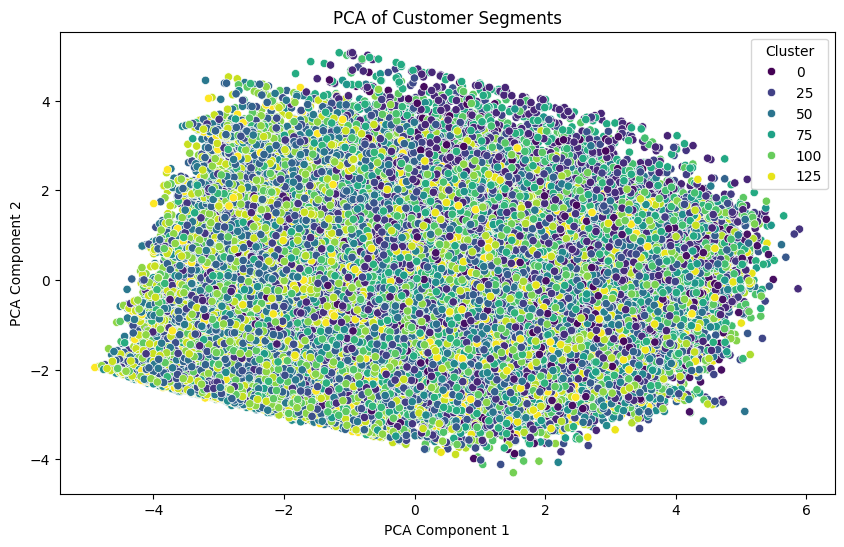

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 사용할 특성 선택
features = ['age_group', 'Customer_Type', 'Type_of_Travel', 'Class',
            'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
            'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
            'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
            'Cleanliness', 'Satisfaction']

# 특성 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# 고객 그룹화 및 각 세그먼트 크기 계산
data['Cluster'] = data[['Gender', 'age_group', 'Customer_Type', 'Type_of_Travel', 'Class']].astype(str).agg('-'.join, axis=1).astype('category').cat.codes
print(data['Cluster'])

# 실루엣 점수 계산
score = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {score}')

# PCA 수행 및 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Customer Segments')
plt.show()

#상위 이용객 그룹 10개 기초통계 및 분포도 & box plot

*   상위 이용객 그룹 10개 고객 수
  15182, 12500, 9575, 7081, 5547, 5205, 4923, 4815, 4801, 4788 명
  
   **->총 74417명 약 5만명으로 전체 고객 중 약 60% 차지 ->이를 집중적으로 분석**

RANK 1 - Age Group: 40-49, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business

RANK 2 - Age Group: 50-59, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business

RANK 3 - Age Group: 30-39, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business

RANK 4 - Age Group: 20-29, Customer Type: disloyal Customer, Type of Travel: Business Travel, Class: Eco

RANK 5 - Age Group: 20-29, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business

RANK 6 - Age Group: 60+, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco

RANK 7 - Age Group: 10-19, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco

RANK 8 - Age Group: 20-29, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco

RANK 9 - Age Group: 40-49, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco

RANK 10 - Age Group: 50-59, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


## 기초 통계 출력

In [ ]:
# 고객 그룹화 및 각 세그먼트 크기 계산
grouped = data.groupby(['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']).size().reset_index(name='Count')

# 상위 10개 그룹 선택
top_10_groups = grouped.sort_values(by='Count', ascending=False).head(10)

In [ ]:
for i,row in enumerate(top_10_groups.iterrows()):
    row = row[1]
    age_group, customer_type, travel_type, travel_class = row[['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']]
    segment = data[(data['age_group'] == age_group) &
                   (data['Customer_Type'] == customer_type) &
                   (data['Type_of_Travel'] == travel_type) &
                   (data['Class'] == travel_class)]
    # if not segment.empty:
    if len(segment)>1:
        print(f'\nRANK {i+1} - Age Group: {age_group_dict[age_group]}, Customer Type: {customer_type_dict[customer_type]}, Type of Travel: {type_of_travel_dict[travel_type]}, Class: {class_dict[travel_class]}')

        # 기초 통계 출력
        print_descriptive_statistics(segment, satisfaction_columns)


RANK 1 - Age Group: 40-49, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00,15182.00
mean,2.79,2.94,2.93,3.01,3.37,4.04,4.07,3.89,3.88,3.92,3.89,3.63,3.89,3.64,0.84
std,1.46,1.48,1.50,1.40,1.23,0.99,0.99,1.10,1.11,1.10,1.11,1.14,1.11,1.13,0.36
min,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,1.00
50%,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00
75%,4.00,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 2 - Age Group: 50-59, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00
mean,2.77,2.92,2.91,2.99,3.40,4.09,4.13,3.90,3.89,3.93,3.91,3.66,3.90,3.68,0.85
std,1.47,1.48,1.50,1.40,1.22,0.97,0.95,1.09,1.10,1.08,1.10,1.11,1.09,1.12,0.36
min,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,1.00
50%,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00
75%,4.00,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 3 - Age Group: 30-39, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00,9575.00
mean,2.75,2.95,2.94,3.01,3.36,3.72,3.74,3.68,3.58,3.57,3.71,3.33,3.72,3.45,0.73
std,1.41,1.46,1.48,1.39,1.30,1.17,1.16,1.21,1.25,1.26,1.18,1.26,1.18,1.26,0.44
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,0.00
50%,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,1.00
75%,4.00,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,4.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 4 - Age Group: 20-29, Customer Type: disloyal Customer, Type of Travel: Business Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00,7081.00
mean,2.63,2.33,2.63,3.00,3.06,2.64,3.02,3.07,3.05,3.13,3.47,3.00,3.47,3.08,0.19
std,1.25,1.60,1.28,1.08,1.38,1.29,1.40,1.38,1.30,1.36,1.11,1.30,1.14,1.38,0.39
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,0.00
50%,3.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,0.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 5 - Age Group: 20-29, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00,5547.00
mean,2.76,2.97,3.00,3.02,3.61,3.62,3.60,3.60,3.27,3.24,3.69,3.27,3.70,3.61,0.68
std,1.35,1.45,1.44,1.41,1.21,1.22,1.21,1.21,1.29,1.30,1.12,1.26,1.13,1.21,0.47
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,2.00,2.00,3.00,2.00,3.00,3.00,0.00
50%,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00,1.00
75%,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,4.00,4.00,5.00,4.00,5.00,5.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 6 - Age Group: 60+, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00,5205.00
mean,2.48,3.67,2.45,2.90,3.11,3.11,3.38,3.05,3.16,2.87,3.38,3.33,3.42,3.20,0.10
std,1.13,1.35,1.23,1.15,1.34,1.35,1.32,1.39,1.34,1.32,1.33,1.25,1.30,1.33,0.30
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,0.00
50%,2.00,4.00,2.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,0.00
75%,3.00,5.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 7 - Age Group: 10-19, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00,4923.00
mean,2.54,3.63,2.48,2.92,3.03,2.50,2.98,3.06,3.33,3.25,3.75,3.32,3.76,3.04,0.11
std,1.14,1.39,1.26,1.14,1.38,1.28,1.41,1.38,1.24,1.29,1.12,1.26,1.10,1.39,0.31
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00
50%,3.00,4.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,0.00
75%,3.00,5.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 8 - Age Group: 20-29, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00,4815.00
mean,2.50,3.65,2.45,2.93,3.03,2.48,2.98,3.06,3.34,3.24,3.78,3.34,3.77,3.06,0.11
std,1.15,1.38,1.27,1.15,1.38,1.28,1.40,1.38,1.26,1.31,1.08,1.26,1.09,1.38,0.31
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00
50%,2.00,4.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,0.00
75%,3.00,5.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 9 - Age Group: 40-49, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00,4801.00
mean,2.52,3.67,2.48,2.93,3.11,3.00,3.33,3.07,3.24,2.97,3.48,3.32,3.51,3.19,0.10
std,1.12,1.37,1.24,1.13,1.35,1.34,1.34,1.37,1.31,1.30,1.30,1.26,1.27,1.33,0.29
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00
50%,3.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,0.00
75%,3.00,5.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 10 - Age Group: 50-59, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00
mean,2.53,3.63,2.51,2.90,3.12,3.09,3.38,3.08,3.23,2.93,3.41,3.35,3.44,3.18,0.10
std,1.14,1.38,1.25,1.14,1.36,1.32,1.33,1.40,1.34,1.34,1.33,1.25,1.31,1.34,0.30
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,0.00
50%,3.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,4.00,3.00,0.00
75%,3.00,5.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 11 - Age Group: 30-39, Customer Type: Loyal Customer, Type of Travel: Personal Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00,4788.00
mean,2.54,3.66,2.48,2.93,3.03,2.50,3.01,3.06,3.37,3.27,3.76,3.37,3.81,3.05,0.10
std,1.14,1.36,1.25,1.14,1.39,1.26,1.42,1.39,1.26,1.28,1.09,1.25,1.08,1.40,0.31
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00
50%,3.00,4.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,0.00
75%,3.00,5.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,0.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 12 - Age Group: 20-29, Customer Type: disloyal Customer, Type of Travel: Business Travel, Class: Business


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00,3868.00
mean,3.03,2.25,3.03,2.88,3.05,2.99,2.99,3.07,3.76,3.44,4.26,3.76,4.26,3.04,0.55
std,1.64,1.90,1.64,1.23,1.39,1.63,1.41,1.38,1.04,1.19,0.78,1.05,0.81,1.38,0.50
min,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,0.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,4.00,3.00,4.00,2.00,0.00
50%,3.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,4.00,4.00,4.00,3.00,1.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,5.00,5.00,5.00,4.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 13 - Age Group: 40-49, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00,3500.00
mean,3.32,2.99,3.03,3.03,3.22,3.25,3.24,3.29,2.95,3.09,3.14,2.79,3.17,3.11,0.51
std,1.26,1.40,1.39,1.39,1.33,1.22,1.22,1.27,1.32,1.37,1.20,1.33,1.21,1.31,0.50
min,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,0.00
50%,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 14 - Age Group: 60+, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Business


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00,3026.00
mean,2.61,2.90,2.92,2.98,3.23,3.66,3.70,3.52,3.52,3.53,3.49,3.24,3.51,3.28,0.61
std,1.39,1.47,1.50,1.40,1.32,1.10,1.08,1.25,1.25,1.25,1.27,1.24,1.25,1.26,0.49
min,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,0.00
50%,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,1.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,4.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00



RANK 15 - Age Group: 50-59, Customer Type: Loyal Customer, Type of Travel: Business Travel, Class: Eco


,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Legroom_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Satisfaction
count,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00,2655.00
mean,3.25,2.94,3.04,3.01,3.09,3.18,3.19,3.26,3.03,3.15,3.21,2.75,3.18,3.01,0.47
std,1.26,1.42,1.41,1.40,1.35,1.21,1.19,1.26,1.30,1.33,1.18,1.30,1.19,1.30,0.50
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,0.00
50%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,0.00
75%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,1.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


## 상위 10개 그룹의 평균 만족도 수치

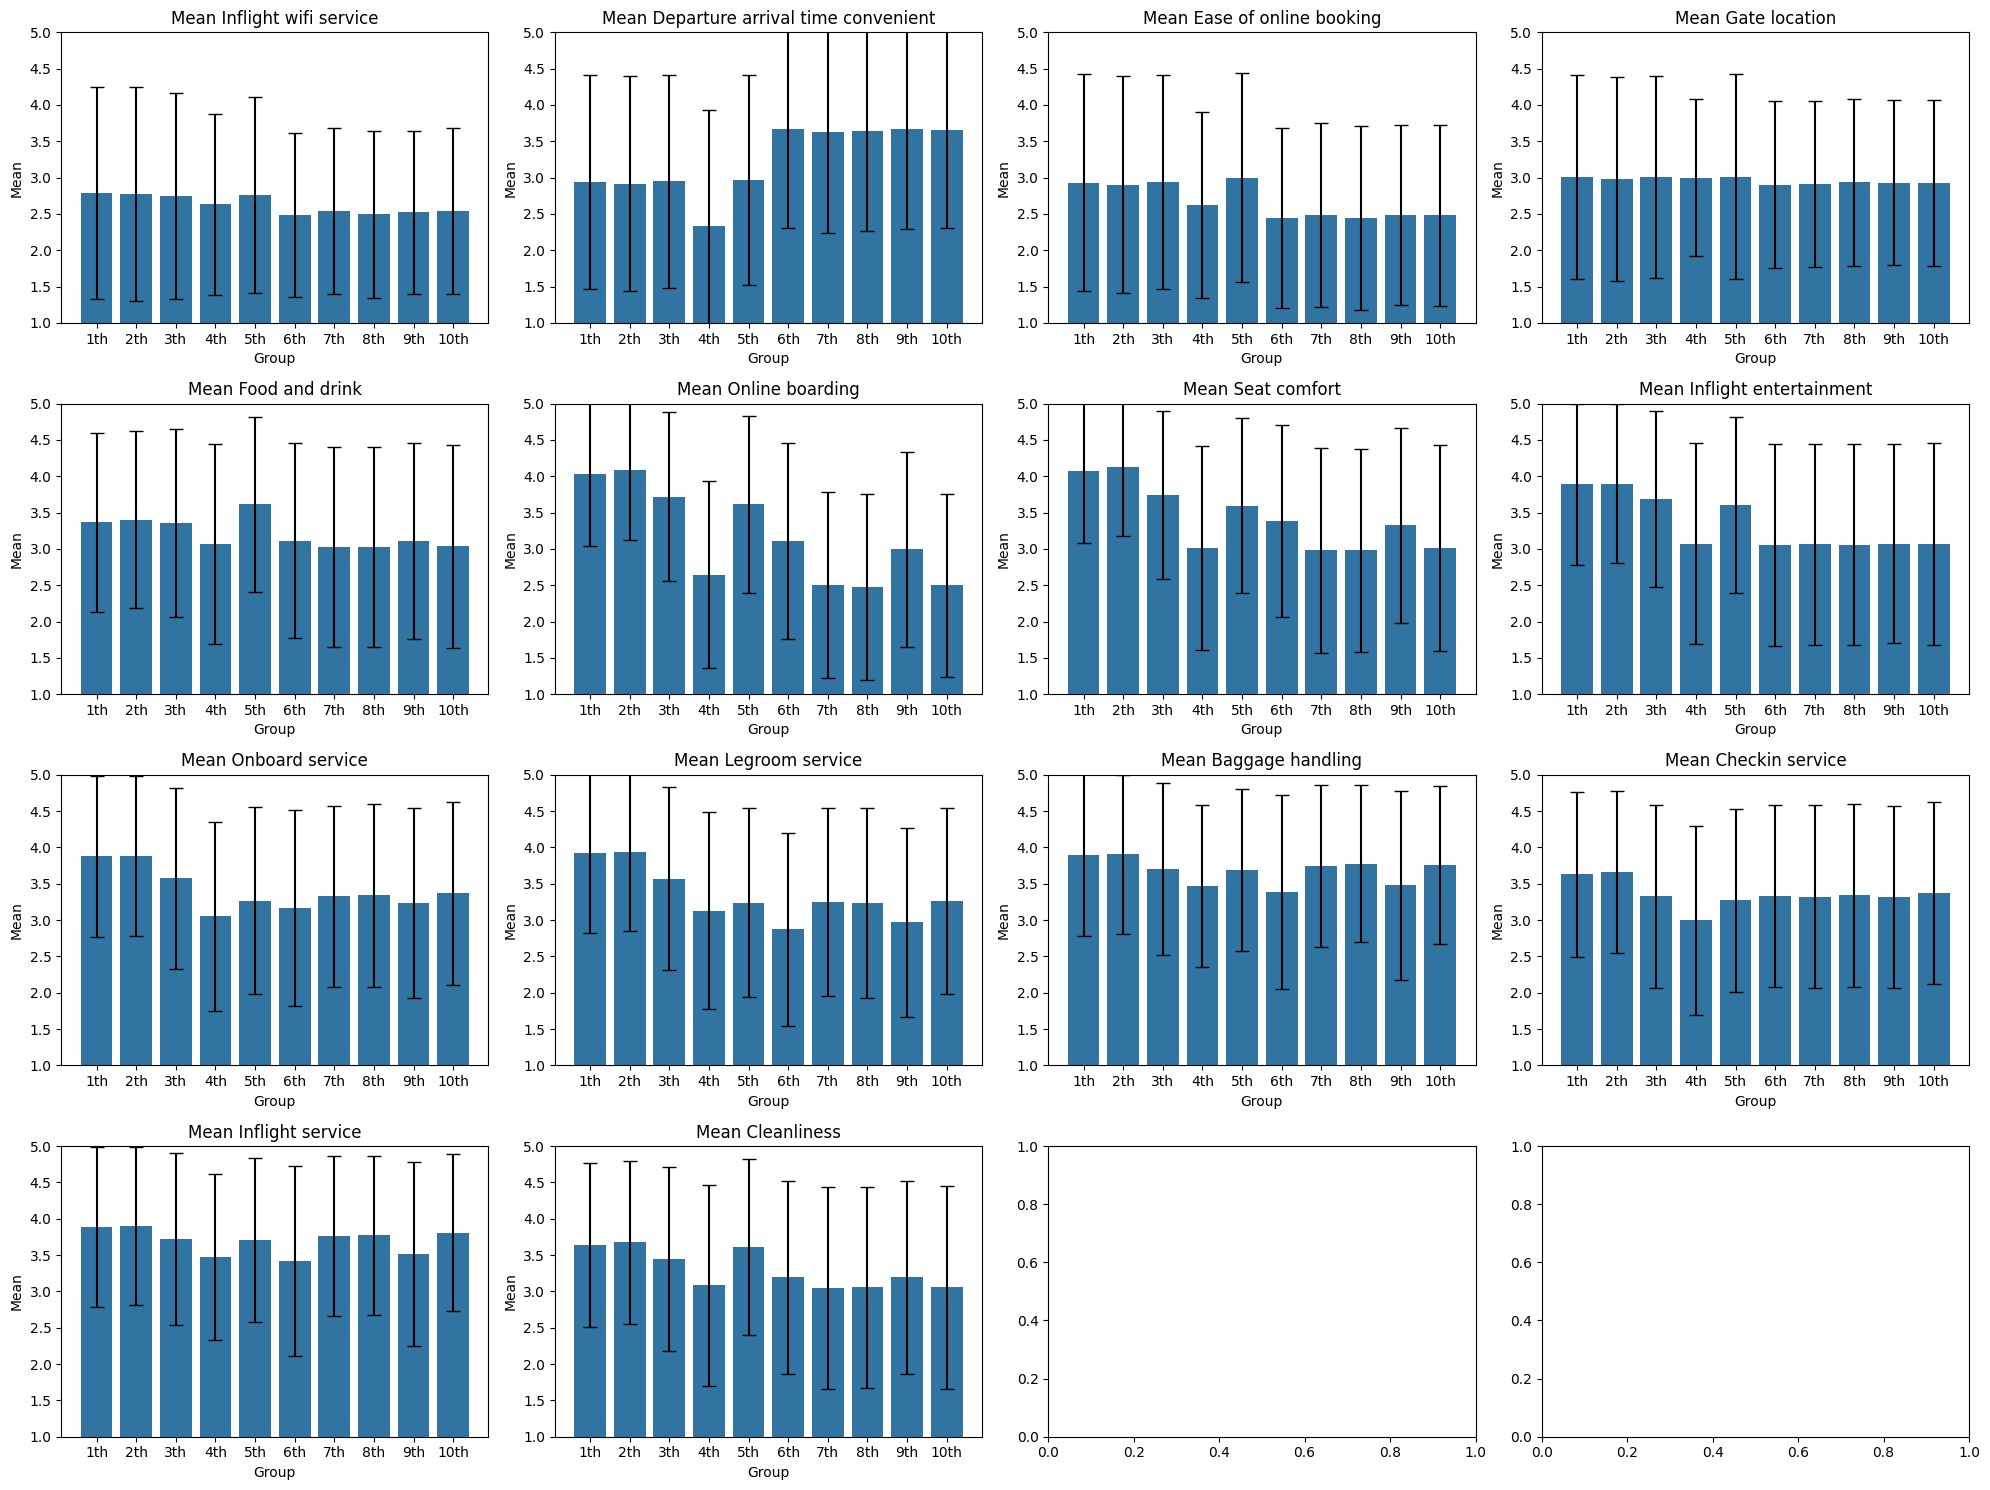

In [ ]:
# 각 세그먼트별 기초 통계량 계산
stats = []

for i, row in enumerate(top_10_groups.iterrows()):
    row=row[1]
    age_group, customer_type, travel_type, travel_class, count = row
    segment = data[(data['age_group'] == age_group) &
                   (data['Customer_Type'] == customer_type) &
                   (data['Type_of_Travel'] == travel_type) &
                   (data['Class'] == travel_class)]

    if not segment.empty:
        mean_vals = segment[satisfaction_columns].mean()
        std_vals = segment[satisfaction_columns].std()
        stats.append({
            'Group': f'{i+1}th',
            'Mean': mean_vals,
            'Std': std_vals
        })

# 데이터프레임 생성
stats_df = pd.DataFrame(stats)
# 시각화
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(satisfaction_columns):
    mean_vals = stats_df['Mean'].apply(lambda x: x[column])
    std_vals = stats_df['Std'].apply(lambda x: x[column])

    sns.barplot(x=stats_df['Group'], y=mean_vals, ax=axes[i], capsize=.2)
    axes[i].errorbar(x=range(len(mean_vals)), y=mean_vals, yerr=std_vals, fmt='none', c='black', capsize=5)
    axes[i].set_title(f'Mean {column.replace("_", " ").capitalize()}')
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel('Mean')
    axes[i].set_ylim(1, 5)
    axes[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

## 상위 10개 그룹의 결괏값(satisfaction) 비율

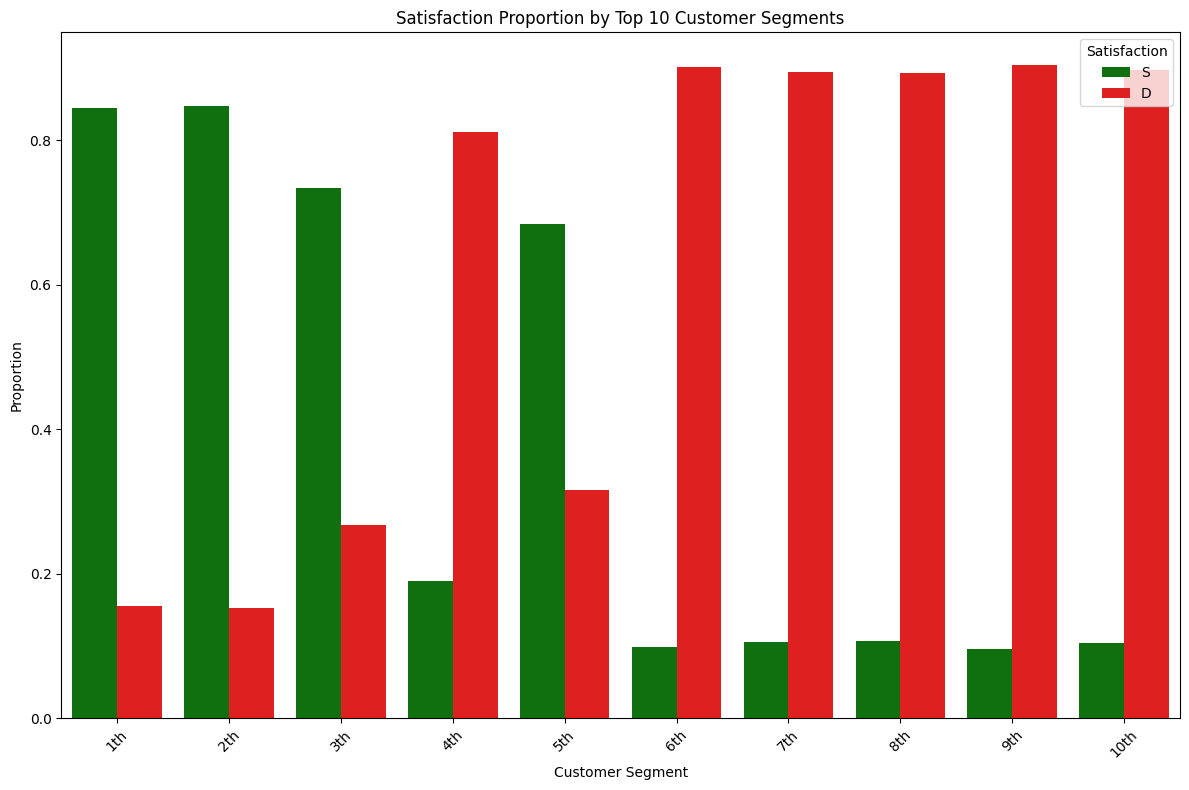

In [ ]:
# 상위 10개 그룹의 만족도 비율 계산 및 시각화
satisfaction_results = []

for i, row in enumerate(top_10_groups.itertuples(), start=1):
    age_group, customer_type, travel_type, travel_class, count = row[1:6]
    segment_data = data[(data['age_group'] == age_group) &
                        (data['Customer_Type'] == customer_type) &
                        (data['Type_of_Travel'] == travel_type) &
                        (data['Class'] == travel_class)]

    if not segment_data.empty:
        satisfaction_counts = segment_data['Satisfaction'].value_counts(normalize=True).reset_index()
        satisfaction_counts.columns = ['Satisfaction', 'Proportion']
        satisfaction_counts['Satisfaction'] = satisfaction_counts['Satisfaction'].replace({0: 'D', 1: 'S'})
        satisfaction_counts['Group'] = f'{i}th'

        satisfaction_results.append(satisfaction_counts)

# 데이터프레임으로 결합
satisfaction_df = pd.concat(satisfaction_results, ignore_index=True)

# 그래프 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=satisfaction_df, x='Group', y='Proportion', hue='Satisfaction', palette={'D': 'red', 'S': 'green'})
plt.title('Satisfaction Proportion by Top 10 Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Proportion')
plt.legend(title='Satisfaction', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*   inflight service, gate location, inflight wifi service는 비슷비슷
*   대체적으로 wifi service는 다른 항목에 비해 낮은 수치
*   추가적인 그래프 해석 필요


*   satisfaction 보았을때, 비행기 클래스가 business인 1,2,3 5 고객군의 만족도 선택률이 높고, eco 탑승객들은 낮음




## **상위 10개 그룹별 만족도 항목 평균 계산 및 시각화**

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.787446
Departure_Arrival_time_convenient       2.942300
           Ease_of_Online_booking       2.930510
                    Gate_location       3.009090
                   Food_and_drink       3.366750
                  Online_boarding       4.035832
                     Seat_comfort       4.071532
           Inflight_entertainment       3.888816
                  Onboard_service       3.881965
                  Legroom_service       3.922803
                 Baggage_handling       3.893887
                  Checkin_service       3.630088
                 Inflight_service       3.886774
                      Cleanliness       3.635621
Satisfaction  Proportion
           S    0.844487
           D    0.155513


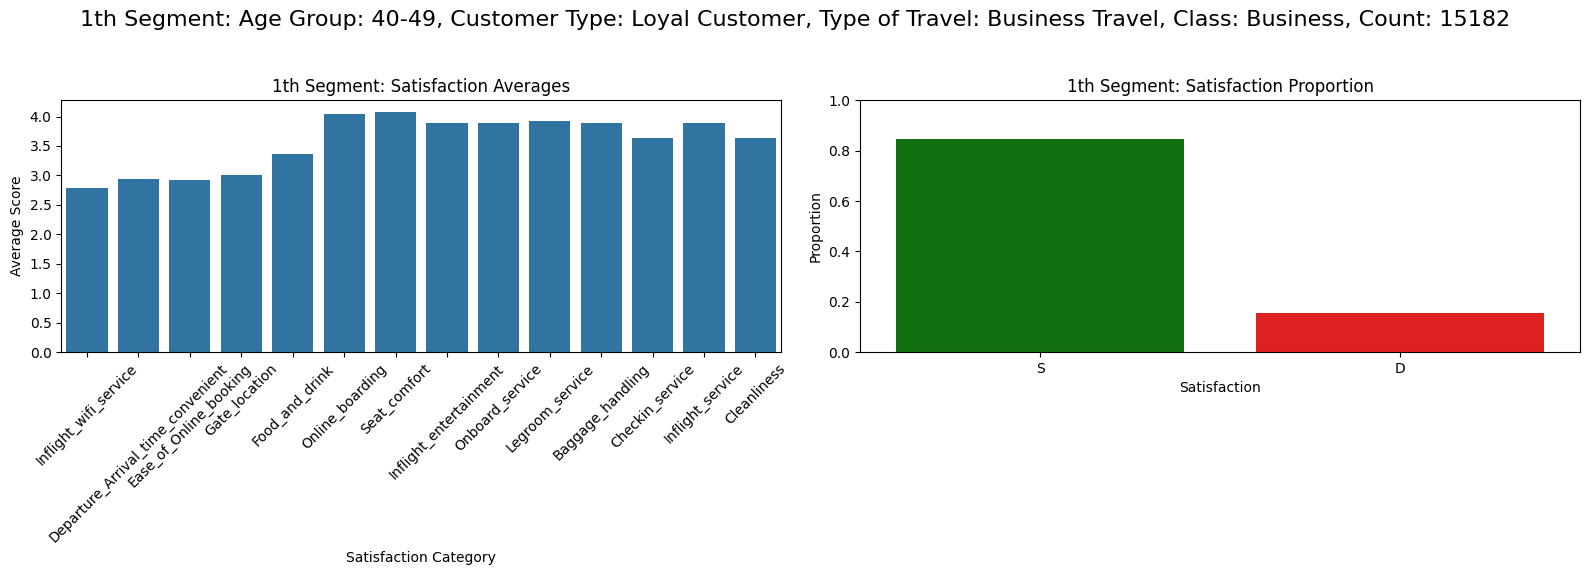

            Satisfaction_Category  Average_Score
            Inflight_wifi_service        2.77432
Departure_Arrival_time_convenient        2.91928
           Ease_of_Online_booking        2.90528
                    Gate_location        2.98544
                   Food_and_drink        3.39984
                  Online_boarding        4.08952
                     Seat_comfort        4.12776
           Inflight_entertainment        3.89944
                  Onboard_service        3.88592
                  Legroom_service        3.93464
                 Baggage_handling        3.90544
                  Checkin_service        3.66088
                 Inflight_service        3.89704
                      Cleanliness        3.67680
Satisfaction  Proportion
           S     0.84768
           D     0.15232


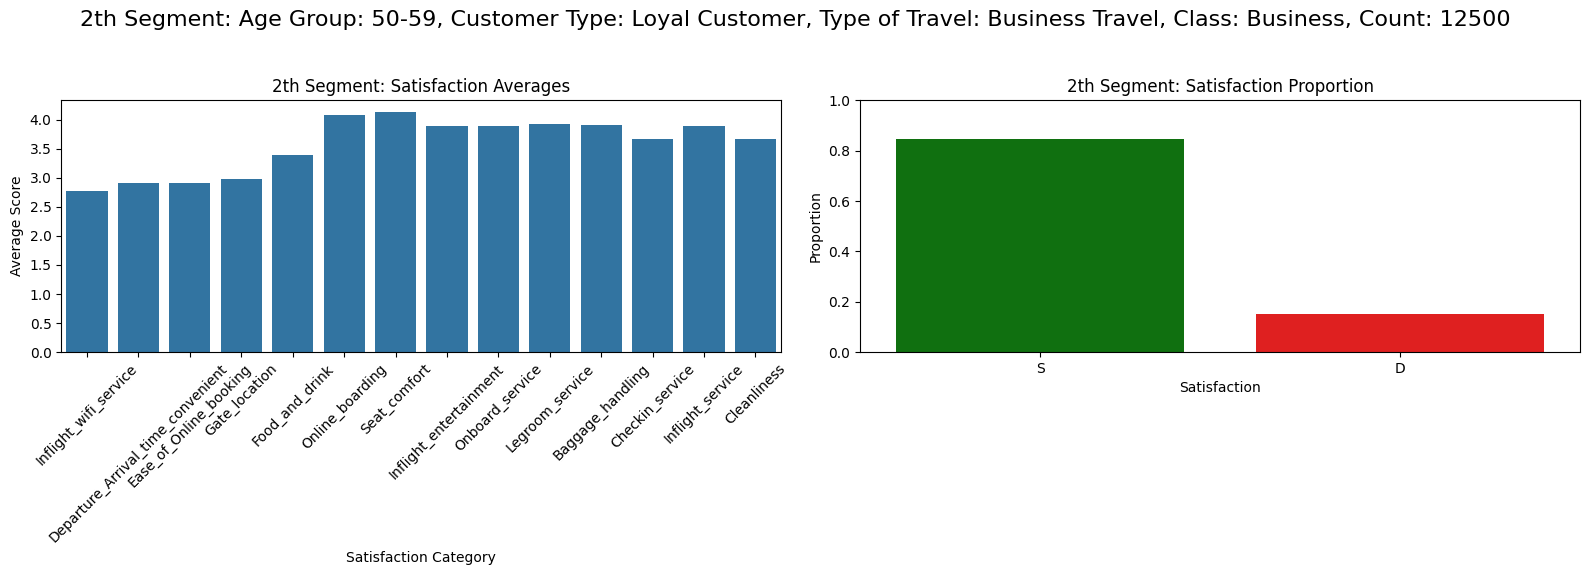

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.748407
Departure_Arrival_time_convenient       2.947572
           Ease_of_Online_booking       2.940052
                    Gate_location       3.011384
                   Food_and_drink       3.357493
                  Online_boarding       3.720313
                     Seat_comfort       3.742245
           Inflight_entertainment       3.684804
                  Onboard_service       3.576292
                  Legroom_service       3.573159
                 Baggage_handling       3.707467
                  Checkin_service       3.331070
                 Inflight_service       3.721358
                      Cleanliness       3.445222
Satisfaction  Proportion
           S    0.733159
           D    0.266841


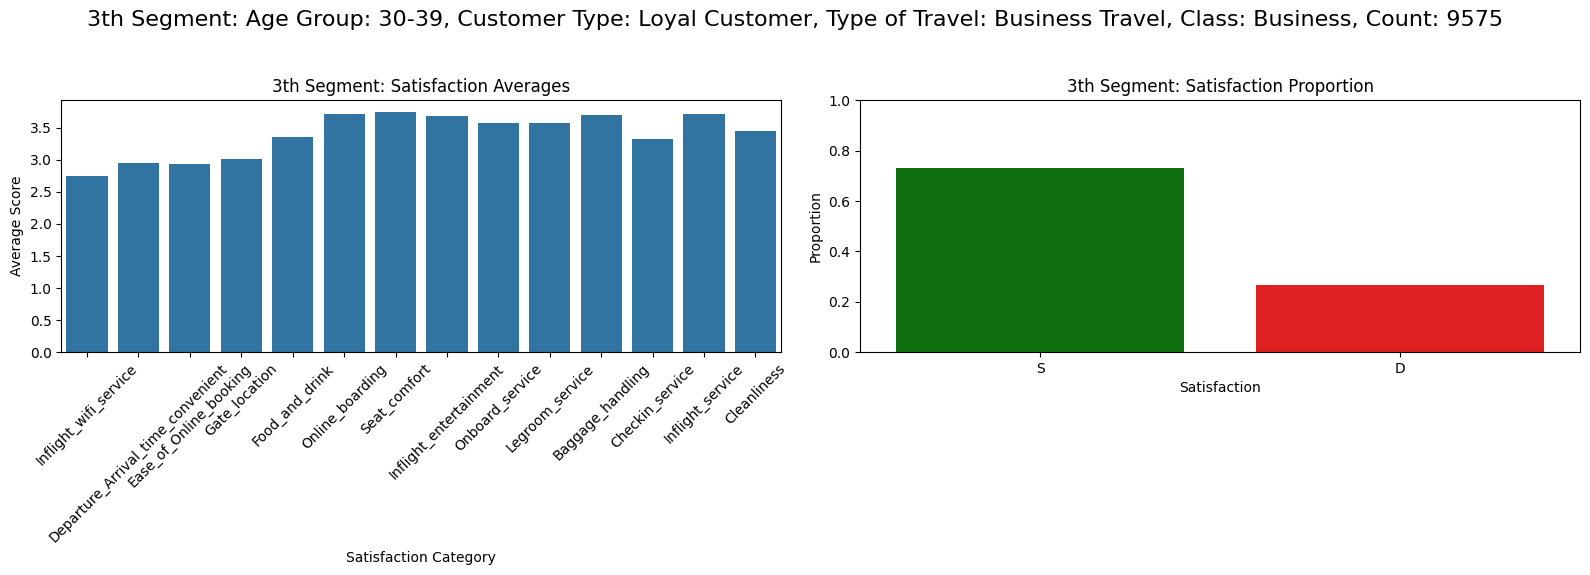

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.631408
Departure_Arrival_time_convenient       2.329191
           Ease_of_Online_booking       2.628160
                    Gate_location       3.001695
                   Food_and_drink       3.063550
                  Online_boarding       2.641858
                     Seat_comfort       3.018218
           Inflight_entertainment       3.071176
                  Onboard_service       3.051123
                  Legroom_service       3.132043
                 Baggage_handling       3.472391
                  Checkin_service       2.997317
                 Inflight_service       3.474792
                      Cleanliness       3.082333
Satisfaction  Proportion
           D    0.810761
           S    0.189239


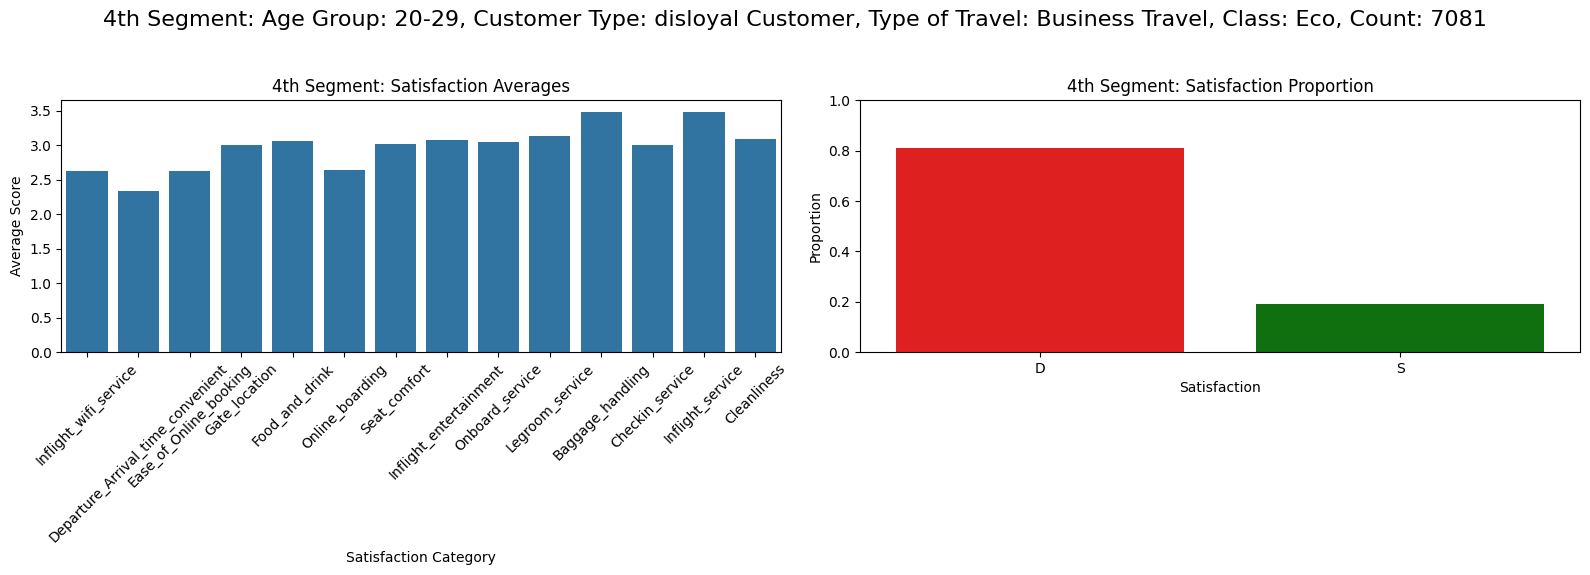

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.757887
Departure_Arrival_time_convenient       2.970074
           Ease_of_Online_booking       3.001803
                    Gate_location       3.015684
                   Food_and_drink       3.611862
                  Online_boarding       3.615648
                     Seat_comfort       3.596719
           Inflight_entertainment       3.600324
                  Onboard_service       3.266991
                  Legroom_service       3.242834
                 Baggage_handling       3.692627
                  Checkin_service       3.271318
                 Inflight_service       3.701460
                      Cleanliness       3.611682
Satisfaction  Proportion
           S    0.683793
           D    0.316207


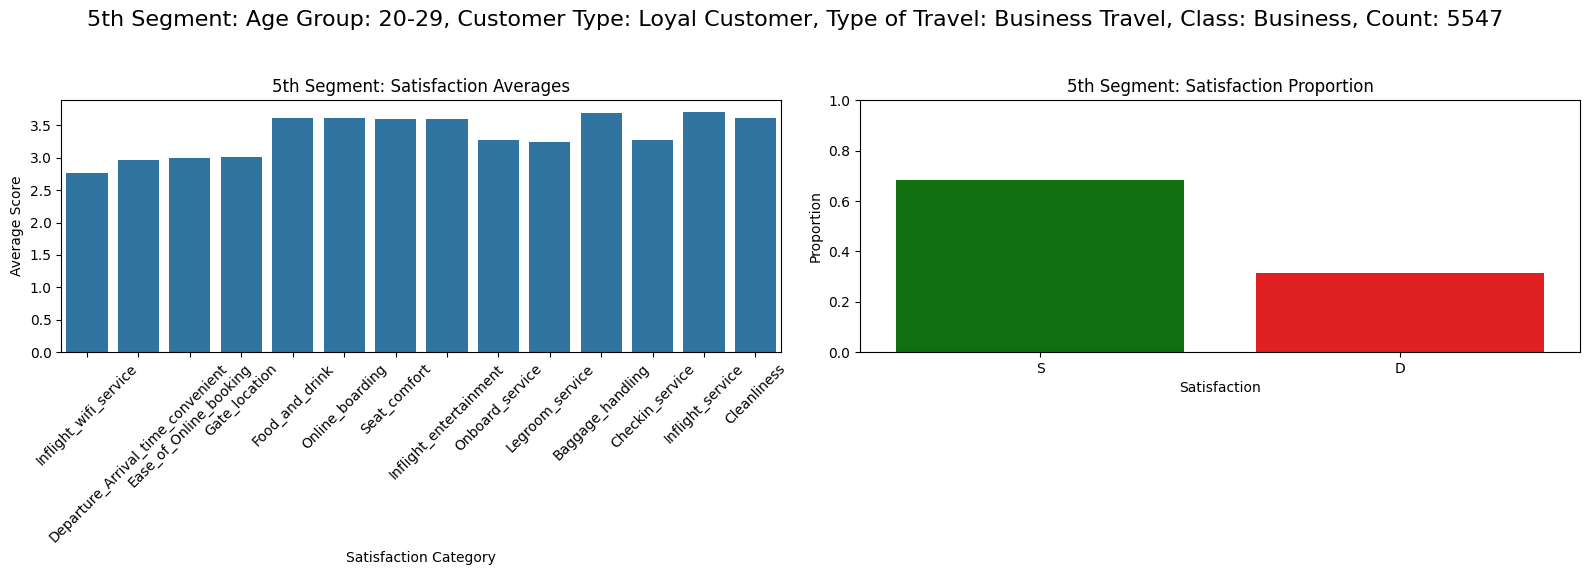

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.482037
Departure_Arrival_time_convenient       3.666667
           Ease_of_Online_booking       2.445725
                    Gate_location       2.902594
                   Food_and_drink       3.112968
                  Online_boarding       3.106820
                     Seat_comfort       3.383477
           Inflight_entertainment       3.054947
                  Onboard_service       3.164649
                  Legroom_service       2.873391
                 Baggage_handling       3.382133
                  Checkin_service       3.331796
                 Inflight_service       3.416330
                      Cleanliness       3.195773
Satisfaction  Proportion
           D    0.901249
           S    0.098751


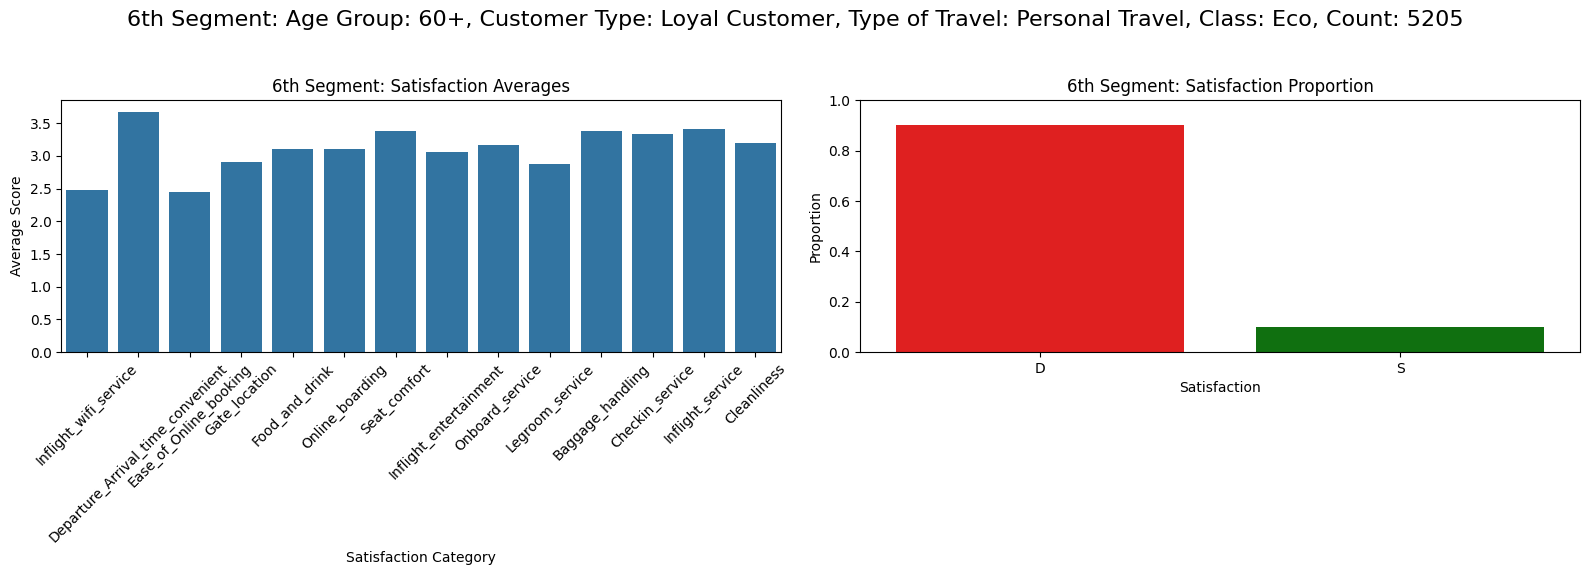

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.541133
Departure_Arrival_time_convenient       3.627463
           Ease_of_Online_booking       2.482429
                    Gate_location       2.915499
                   Food_and_drink       3.025797
                  Online_boarding       2.500305
                     Seat_comfort       2.979687
           Inflight_entertainment       3.062563
                  Onboard_service       3.331302
                  Legroom_service       3.250254
                 Baggage_handling       3.746293
                  Checkin_service       3.323786
                 Inflight_service       3.763356
                      Cleanliness       3.044891
Satisfaction  Proportion
           D    0.893967
           S    0.106033


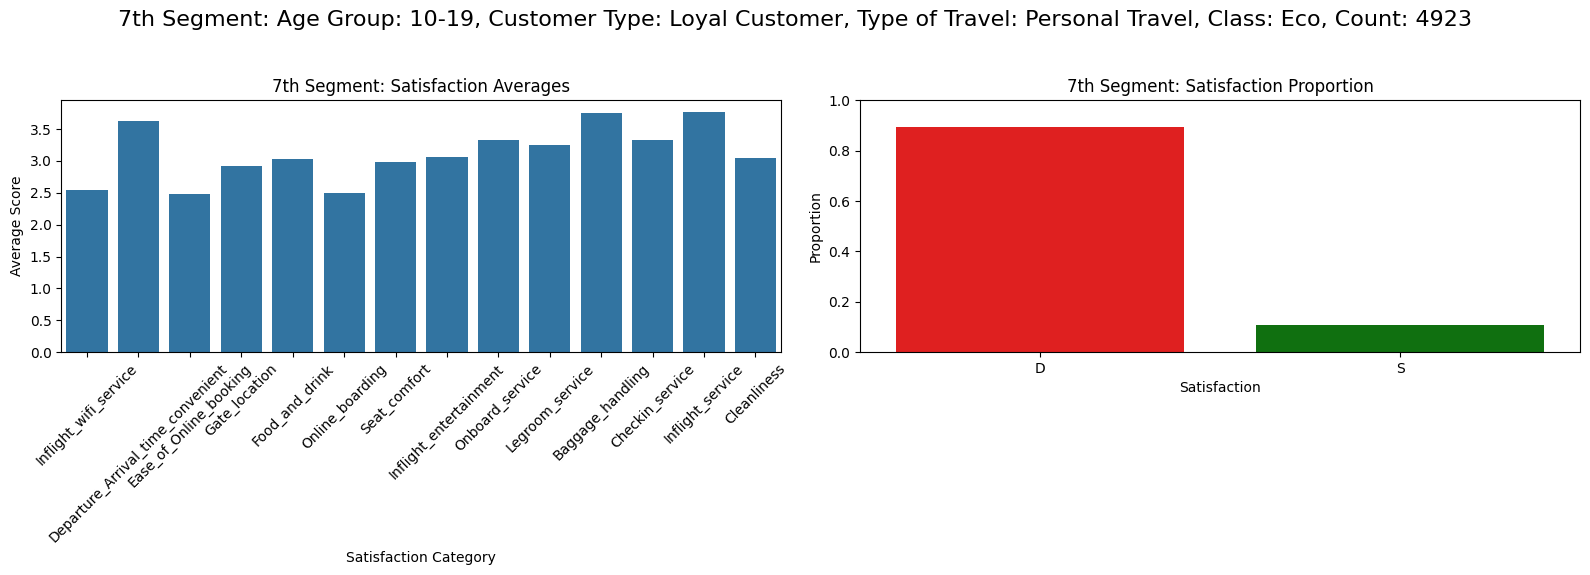

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.496781
Departure_Arrival_time_convenient       3.645275
           Ease_of_Online_booking       2.448183
                    Gate_location       2.934164
                   Food_and_drink       3.026168
                  Online_boarding       2.476220
                     Seat_comfort       2.979439
           Inflight_entertainment       3.056490
                  Onboard_service       3.344341
                  Legroom_service       3.236968
                 Baggage_handling       3.777778
                  Checkin_service       3.342056
                 Inflight_service       3.770301
                      Cleanliness       3.055244
Satisfaction  Proportion
           D    0.893043
           S    0.106957


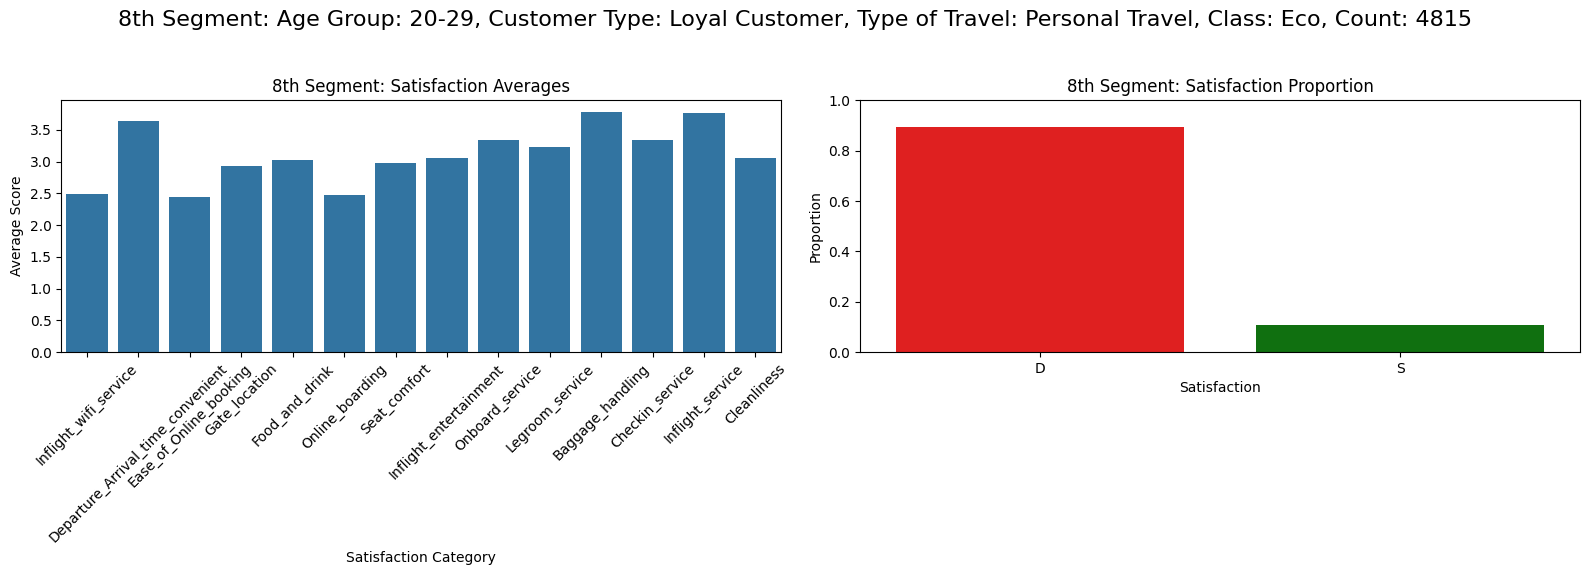

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.524057
Departure_Arrival_time_convenient       3.666111
           Ease_of_Online_booking       2.483858
                    Gate_location       2.928557
                   Food_and_drink       3.109977
                  Online_boarding       2.996042
                     Seat_comfort       3.325557
           Inflight_entertainment       3.068319
                  Onboard_service       3.238284
                  Legroom_service       2.972297
                 Baggage_handling       3.476984
                  Checkin_service       3.315559
                 Inflight_service       3.511560
                      Cleanliness       3.193293
Satisfaction  Proportion
           D     0.90377
           S     0.09623


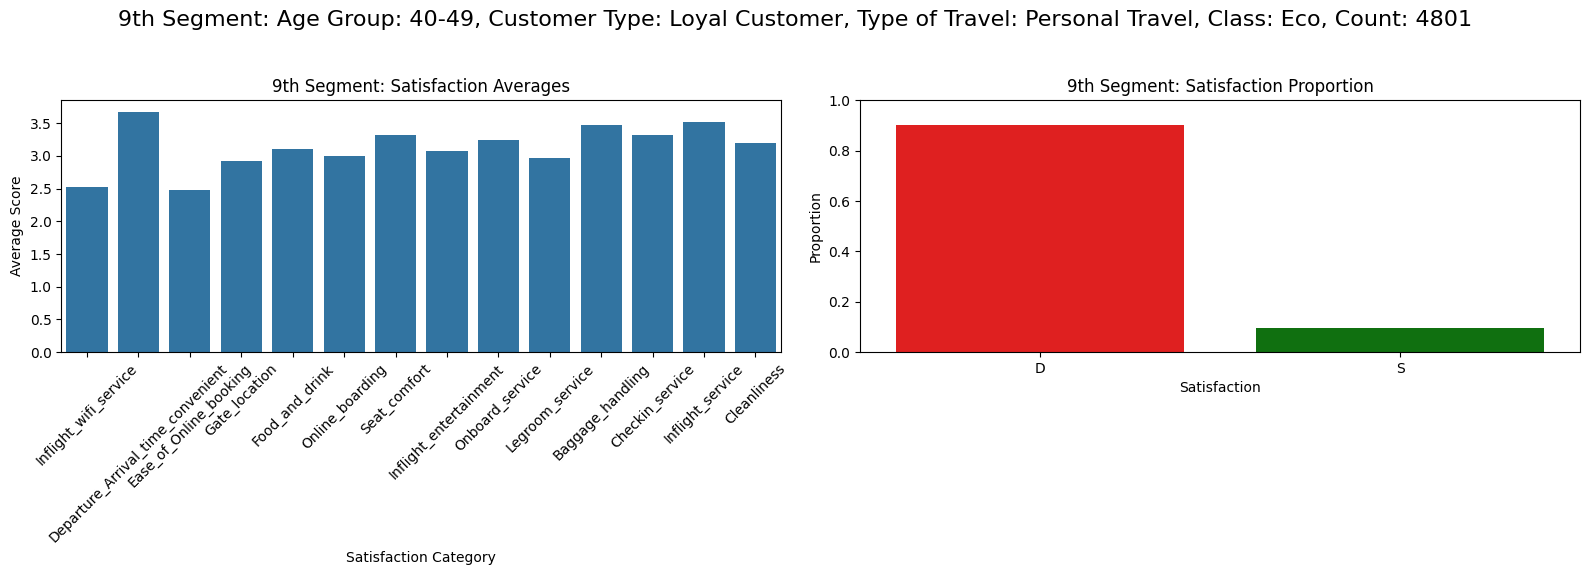

            Satisfaction_Category  Average_Score
            Inflight_wifi_service       2.539056
Departure_Arrival_time_convenient       3.661236
           Ease_of_Online_booking       2.481412
                    Gate_location       2.927945
                   Food_and_drink       3.034461
                  Online_boarding       2.500000
                     Seat_comfort       3.010234
           Inflight_entertainment       3.064954
                  Onboard_service       3.368630
                  Legroom_service       3.267335
                 Baggage_handling       3.755848
                  Checkin_service       3.370301
                 Inflight_service       3.809733
                      Cleanliness       3.054511
Satisfaction  Proportion
           D    0.896199
           S    0.103801


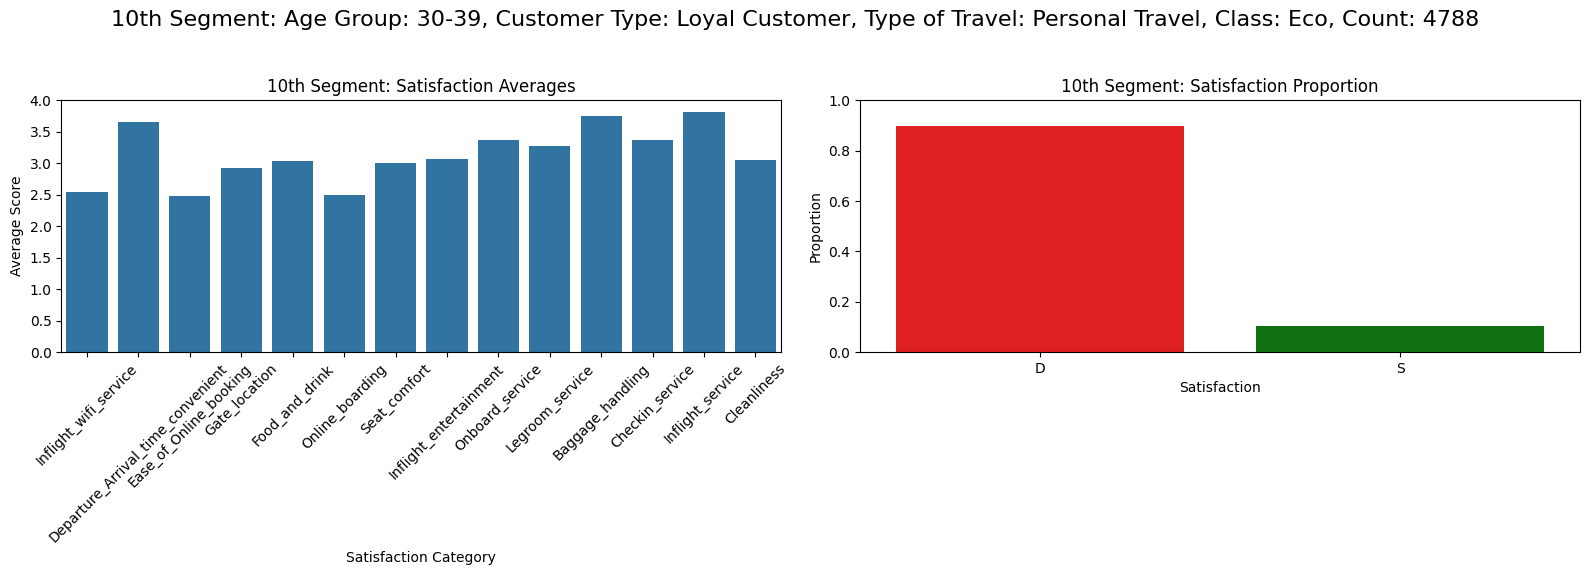

In [ ]:
# 각 세그먼트별 만족도 항목 평균 계산 및 시각화
for i, row in enumerate(top_10_groups.iterrows(), start=1):
    row=row[1]
    age_group, customer_type, travel_type, travel_class, count = row
    segment_data = data[(data['age_group'] == age_group) &
                        (data['Customer_Type'] == customer_type) &
                        (data['Type_of_Travel'] == travel_type) &
                        (data['Class'] == travel_class)]

    if not segment_data.empty:
        # 만족도 항목 평균 계산
        means = segment_data[satisfaction_columns].mean()
        means_df = pd.DataFrame(means).reset_index()
        means_df.columns = ['Satisfaction_Category', 'Average_Score']

        # 만족도 비율 계산
        satisfaction_counts = segment_data['Satisfaction'].value_counts(normalize=True).reset_index()
        satisfaction_counts.columns = ['Satisfaction', 'Proportion']
        satisfaction_counts['Satisfaction'] = satisfaction_counts['Satisfaction'].replace({0: 'D', 1: 'S'})

        group_title = (f'{i}th Segment: Age Group: {age_group_dict[age_group]}, '
                       f'Customer Type: {customer_type_dict[customer_type]}, Type of Travel: {type_of_travel_dict[travel_type]}, '
                       f'Class: {class_dict[travel_class]}, Count: {count}')

        # Means DataFrame formatting
        print(means_df.to_string(index=False))

        # Satisfaction counts formatting
        print(satisfaction_counts.to_string(index=False))

        # 서브플롯 설정
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # 만족도 항목 평균 시각화 (막대 그래프)
        sns.barplot(data=means_df, x='Satisfaction_Category', y='Average_Score', ax=axes[0])
        axes[0].set_title(f'{i}th Segment: Satisfaction Averages')
        axes[0].set_xlabel('Satisfaction Category')
        axes[0].set_ylabel('Average Score')
        axes[0].tick_params(axis='x', rotation=45)

        # 만족도 비율 시각화 (막대 그래프)
        sns.barplot(data=satisfaction_counts, x='Satisfaction', y='Proportion', hue = 'Satisfaction', palette={'D': 'red', 'S': 'green'}, ax=axes[1])
        axes[1].set_title(f'{i}th Segment: Satisfaction Proportion')
        axes[1].set_xlabel('Satisfaction')
        axes[1].set_ylabel('Proportion')
        axes[1].set_ylim(0, 1)

        # 전체 제목 및 레이아웃 조정
        fig.suptitle(group_title, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        # 그래프 저장
        plt.savefig(os.path.join(output_dir, f'{i}_th_segment.png'))
        plt.show()

## 상위 10개 그룹별 각 만족도 항목 박스플롯 및 히스토그램 시각화

In [ ]:
# 각 세그먼트별 박스플롯 및 히스토그램 시각화
for i,row in enumerate(top_10_groups.iterrows()):
    row = row[1]
    age_group, customer_type, travel_type, travel_class, count = row
    segment = data[(data['age_group'] == age_group) &
                   (data['Customer_Type'] == customer_type) &
                   (data['Type_of_Travel'] == travel_type) &
                   (data['Class'] == travel_class)]

    if not segment.empty:
        group_title = (f'Age Group: {age_group_dict[age_group]}, '
                       f'Customer Type: {customer_type_dict[customer_type]}, Type of Travel: {type_of_travel_dict[travel_type]}, '
                       f'Class: {class_dict[travel_class]}, Count: {count}')
        print(group_title)

        # 박스플롯 시각화
        plt.figure(figsize=(20, 10))
        plt.suptitle(group_title)
        for j, column in enumerate(satisfaction_columns):
            plt.subplot(3, 5, j + 1)
            sns.boxplot(x='Satisfaction', y=column, data=segment)
            plt.title(column.replace('_', ' ').capitalize())
            plt.tight_layout(rect=[0, 0, 1, 0.96])
        #plot 저장
        # plt.savefig(os.path.join(output_dir, f'{i+1}_th_group_boxplot.png'))
        plt.show()

        # 히스토그램 시각화
        plt.figure(figsize=(20, 10))
        plt.suptitle(group_title)
        for k, column in enumerate(satisfaction_columns):
            plt.subplot(3, 5, k + 1)
            sns.histplot(segment[column], kde=True)
            plt.title(column.replace('_', ' ').capitalize())
            plt.tight_layout(rect=[0, 0, 1, 0.96])
        #plot 저장
        # plt.savefig(os.path.join(output_dir, f'{i+1}_th_group_satisfaction_histogram.png'))
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

##이용객 수 많은 고객 그룹 상위 10개 상관계수

In [ ]:
# 고객 그룹화 및 크기 계산
grouped = data.groupby(['Gender', 'age_group', 'Customer_Type', 'Type_of_Travel', 'Class']).size().reset_index(name='Count')

# 크기 기준으로 정렬
grouped = grouped.sort_values(by='Count', ascending=False)

# 상위 10개 그룹 출력
print(grouped.head(10))

grouped = grouped.head(10)

# 자동화된 세그먼트 분석
for i,row in enumerate(grouped.iterrows()):
    row = row[1]
    gender, age_group, customer_type, travel_type, travel_class, count = row
    segment = data[(data['Gender'] == gender) &
                   (data['age_group'] == age_group) &
                   (data['Customer_Type'] == customer_type) &
                   (data['Type_of_Travel'] == travel_type) &
                   (data['Class'] == travel_class)]

    if not segment.empty:
        print(f'\nSegment - Gender: {gender}, Age Group: {age_group}, Customer Type: {customer_type}, Type of Travel: {travel_type}, Class: {travel_class}, Count: {count}')

        # 기초 통계 출력
        print_descriptive_statistics(segment, satisfaction_columns)

        # 상관 관계 출력
        correlation_matrix = segment[satisfaction_columns].corr(method='spearman')
        # print("Correlation Matrix:")
        # print(correlation_matrix)

        # 상관 관계 히트맵 시각화
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Spearman Correlation Matrix for Satisfaction Attributes\nRANK:{i+1}, Age Group={age_group_dict[age_group]}, Customer Type={customer_type_dict[customer_type]}, Type of Travel={type_of_travel_dict[travel_type]}, Class={class_dict[travel_class]}')
        #plot 저장
        # plt.savefig(os.path.join(output_dir, f'{i+1}_th_group_corr_heatmap(top_10_group).png'))
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Figure size 2000x1000 with 0 Axes>

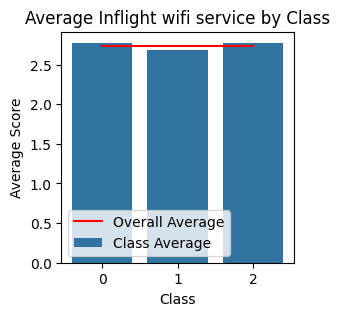

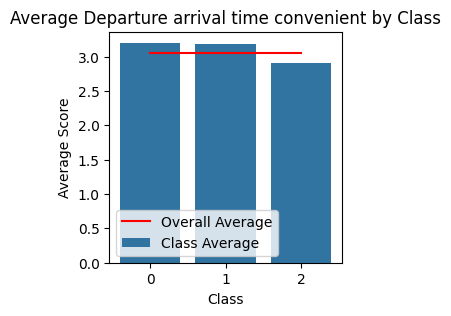

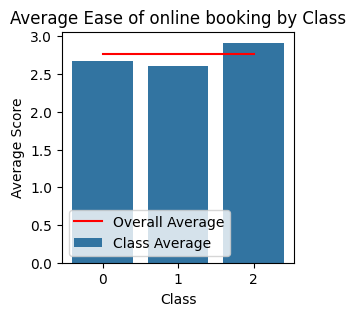

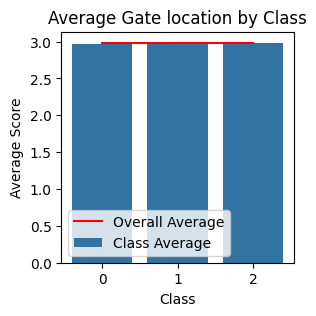

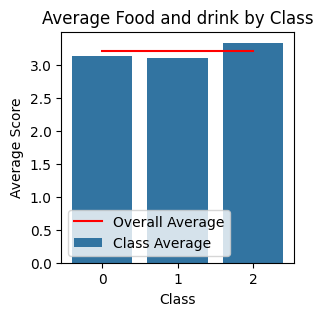

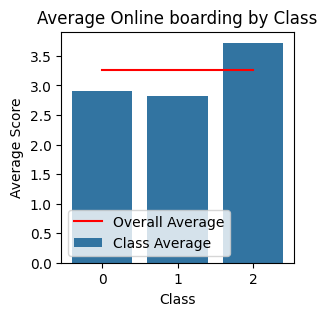

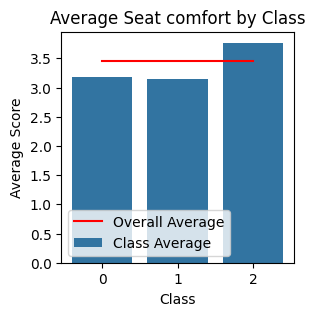

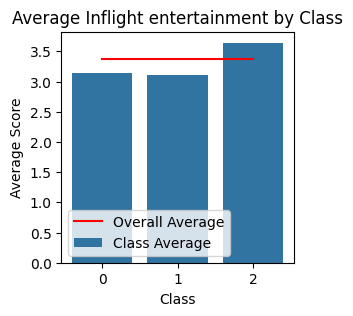

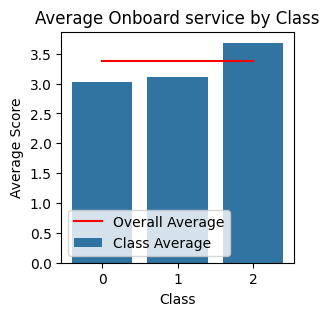

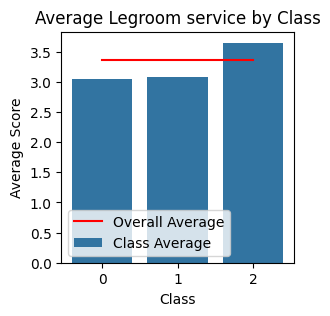

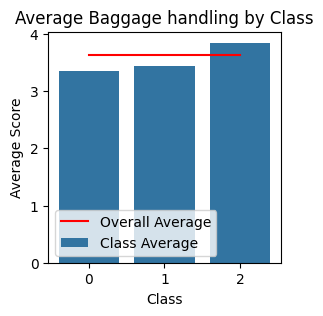

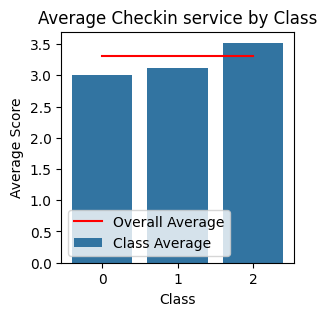

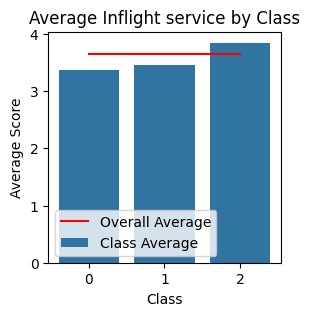

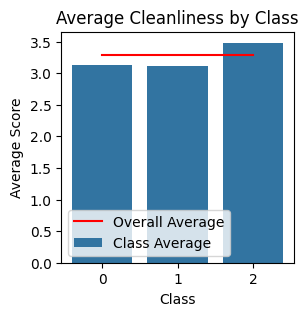

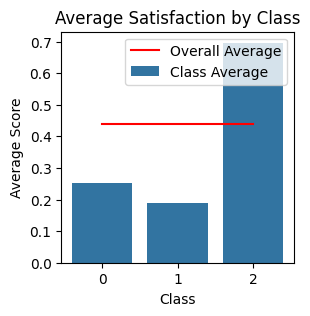

In [ ]:
# 전체 고객의 평균 만족도 계산
overall_means = data[satisfaction_columns].mean().reset_index()
overall_means.columns = ['Satisfaction_Category', 'Overall_Average']

# 클래스별 평균 만족도 계산
class_means = data.groupby('Class')[satisfaction_columns].mean().reset_index()

# 시각화를 위한 데이터프레임 생성
class_means_melted = class_means.melt(id_vars='Class', value_vars=satisfaction_columns, var_name='Satisfaction_Category', value_name='Class_Average')

# 전체 평균을 클래스별 데이터프레임에 병합
class_means_melted = pd.merge(class_means_melted, overall_means, on='Satisfaction_Category')

# 시각화
plt.figure(figsize=(20, 10))
for satisfaction_category in satisfaction_columns:
    subset = class_means_melted[class_means_melted['Satisfaction_Category'] == satisfaction_category]
    plt.figure(figsize=(3, 3))
    sns.barplot(data=subset, x='Class', y='Class_Average', label='Class Average')
    sns.lineplot(data=subset, x='Class', y='Overall_Average', color='red', label='Overall Average')
    plt.title(f'Average {satisfaction_category.replace("_", " ").capitalize()} by Class')
    plt.xlabel('Class')
    plt.ylabel('Average Score')
    plt.legend()
    plt.show()

## 각 만족도 항목별 상위 10개 그룹의 박스플롯 및 히스토그램 시각화

In [ ]:
# satisfaction_columns = [
#     'Inflight_wifi_service', 'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
#     'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
#     'Onboard_service', 'Legroom_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service',
#     'Cleanliness', 'Satisfaction'
# ]

# # 고객 그룹화 및 각 세그먼트 크기 계산
# grouped = data.groupby(['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']).size().reset_index(name='Count')

# # 상위 10개 그룹 선택
# top_10_groups = grouped.sort_values(by='Count', ascending=False).head(10)


# 각 만족도 항목별 상위 10개 그룹의 박스플롯 및 히스토그램 시각화
for k, column in enumerate(satisfaction_columns):
    plt.figure(figsize=(20, 10))
    plt.suptitle(f'{column.replace("_", " ").capitalize()} - Top 10 Groups', fontsize=16)

    for i, row in enumerate(top_10_groups.itertuples(), start=1):
        age_group, customer_type, travel_type, travel_class, count = row[1:6]
        segment = data[(data['age_group'] == age_group) &
                       (data['Customer_Type'] == customer_type) &
                       (data['Type_of_Travel'] == travel_type) &
                       (data['Class'] == travel_class)]

        if not segment.empty:
            # 박스플롯 시각화
            plt.subplot(3, 5, i)
            sns.boxplot(x='Satisfaction', y=column, data=segment, showfliers=False)
            plt.title(f'{i}th group')
            plt.xlabel('')
            plt.ylabel('')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

    plt.figure(figsize=(20, 10))
    plt.suptitle(f'{column.replace("_", " ").capitalize()} - Top 10 Groups', fontsize=16)

    for i, row in enumerate(top_10_groups.itertuples(), start=1):
        age_group, customer_type, travel_type, travel_class, count = row[1:6]
        segment = data[(data['age_group'] == age_group) &
                       (data['Customer_Type'] == customer_type) &
                       (data['Type_of_Travel'] == travel_type) &
                       (data['Class'] == travel_class)]

        if not segment.empty:
            # 히스토그램 시각화
            plt.subplot(3, 5, i)
            sns.histplot(segment[column], kde=True)
            plt.title(f'{i}th group')
            plt.xlabel('')
            plt.ylabel('')
            plt.tight_layout()

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# --------------


#전체 승객 만족도 항목별 점수분포 boxplot

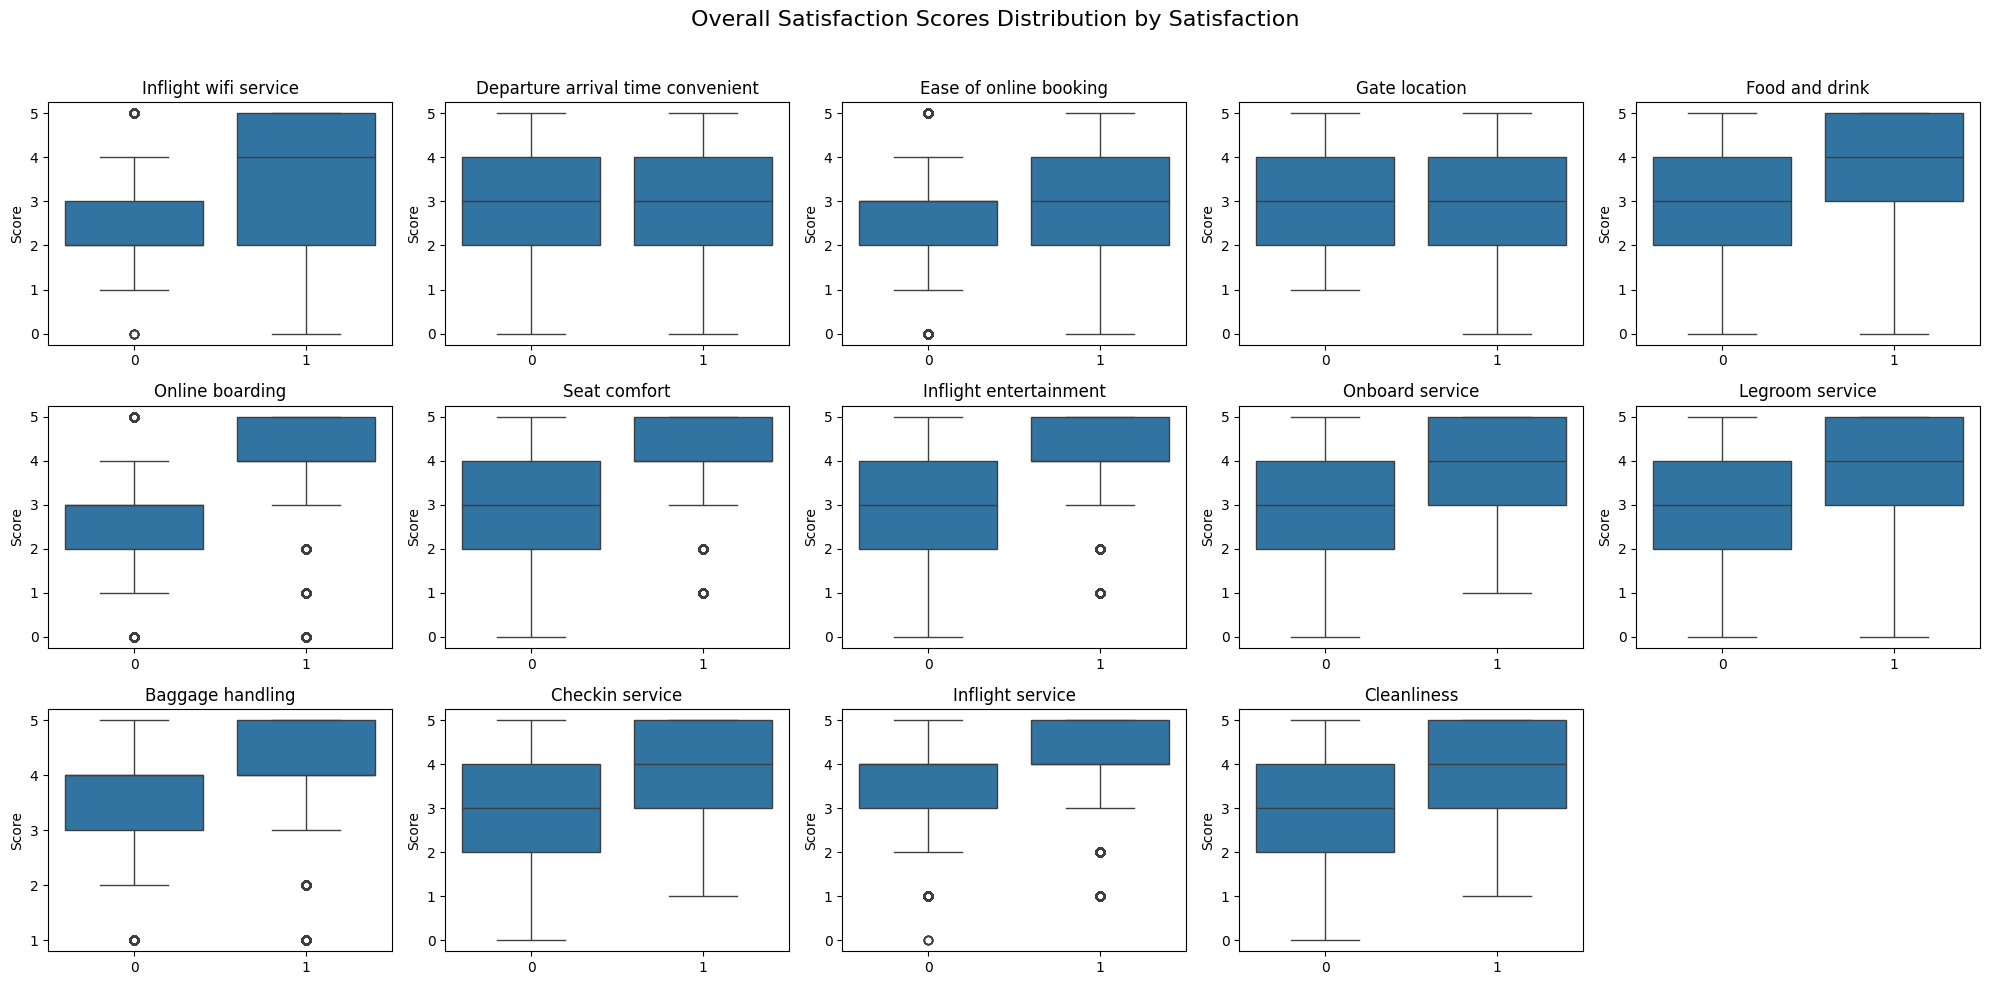

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 박스플롯 시각화
plt.figure(figsize=(20, 10))
plt.suptitle('Overall Satisfaction Scores Distribution by Satisfaction', fontsize=16)

for i, column in enumerate(satisfaction_columns_wo_satisfaction):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x='Satisfaction', y=column, data=data)
    plt.title(column.replace('_', ' ').capitalize())
    plt.xlabel('')
    plt.ylabel('Score')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


# 상위 10그룹 만족도 항목 별 카이제곱 적합도 검정

In [ ]:
import numpy as np
from scipy.stats import chisquare
import pandas as pd
import matplotlib.pyplot as plt
# 세분화 기준 컬럼들
segmentation_columns = ["age_group", "Customer_Type", "Type_of_Travel", "Class"]

# 그룹화 및 그룹 크기 계산
grouped_data = data.groupby(segmentation_columns).size().reset_index(name='counts')

# 상위 10개 그룹 선택
top_10_groups = grouped_data.nlargest(10, 'counts')

# 결과 저장을 위한 딕셔너리
chi2_results = {}

# 각 상위 그룹에 대해 카이제곱 적합도 검정 수행
for _, row in top_10_groups.iterrows():
    age_group = row['age_group']
    customer_type = row['Customer_Type']
    travel_type = row['Type_of_Travel']
    travel_class = row['Class']

    # 세분화된 데이터 필터링
    subset = data[(data["age_group"] == age_group) &
                  (data["Customer_Type"] == customer_type) &
                  (data["Type_of_Travel"] == travel_type) &
                  (data["Class"] == travel_class)]

    for column in satisfaction_columns:
        observed = subset[column].value_counts().sort_index()
        # 관측된 데이터의 길이가 0~5점까지 모두 포함하지 않을 경우 처리
        full_range = np.arange(6)
        observed = observed.reindex(full_range, fill_value=0)
        expected = np.full(len(observed), observed.mean())  # 기대 빈도는 관찰된 데이터의 평균으로 설정

        chi2_stat, p_val = chisquare(observed, f_exp=expected)

        result_key = (age_group, customer_type, travel_type, travel_class, column)
        chi2_results[result_key] = {"Chi2 Statistic": chi2_stat, "P-value": p_val, "Observed": observed, "Expected": expected}

# 결과 출력 및 시각화
for key, results in chi2_results.items():
    age_group, customer_type, travel_type, travel_class, column = key
    print(f"Age Group: {age_group}, Customer Type: {customer_type}, Travel Type: {travel_type}, Class: {travel_class}, Column: {column}")
    print(f"  Chi2 Statistic: {results['Chi2 Statistic']}")
    print(f"  P-value: {results['P-value']}")
    alpha = 0.05
    if results['P-value'] < alpha:
        print("  Reject the null hypothesis: The observed data does not fit the expected distribution.")
    else:
        print("  Fail to reject the null hypothesis: The observed data fits the expected distribution.")

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.bar(results["Observed"].index - 0.2, results["Observed"], width=0.4, label='Observed')
    plt.bar(range(len(results["Expected"])), results["Expected"], width=0.4, label='Expected', align='edge')

    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'{column} - {age_group}, {customer_type}, {travel_type}, {travel_class}')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 상위 10그룹 만족도 항목 별 카이제곱 독립성 검정

In [ ]:
from scipy.stats import chi2_contingency
# 세분화 기준 컬럼들
segmentation_columns = ["age_group", "Customer_Type", "Type_of_Travel", "Class"]

# 결과 저장을 위한 딕셔너리
chi2_results = {}

# 각 세분화된 그룹에 대해 카이제곱 독립성 검정 수행
for column in satisfaction_columns:
    # 교차표 생성
    contingency_table = pd.crosstab(index=data[column], columns=data[segmentation_columns[0]])

    # 카이제곱 독립성 검정 수행
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    chi2_results[(column, segmentation_columns[0])] = {
        "Chi2 Statistic": chi2_stat,
        "P-value": p_val,
        "Degrees of Freedom": dof,
        "Expected Frequencies": expected
    }

# 결과 출력
for key, results in chi2_results.items():
    column, seg_column = key
    print(f"Satisfaction Column: {column}, Segmentation Column: {seg_column}")
    print(f"  Chi2 Statistic: {results['Chi2 Statistic']}")
    print(f"  P-value: {results['P-value']}")
    print(f"  Degrees of Freedom: {results['Degrees of Freedom']}")
    alpha = 0.05
    if results['P-value'] < alpha:
        print("  Reject the null hypothesis: There is a significant association between {column} and {seg_column}.")
    else:
        print("  Fail to reject the null hypothesis: There is no significant association between {column} and {seg_column}.")
    print()

Satisfaction Column: Inflight_wifi_service, Segmentation Column: age_group
  Chi2 Statistic: 991.6158670985837
  P-value: 3.4946383576893677e-193
  Degrees of Freedom: 25
  Reject the null hypothesis: There is a significant association between {column} and {seg_column}.

Satisfaction Column: Departure_Arrival_time_convenient, Segmentation Column: age_group
  Chi2 Statistic: 4023.99877906138
  P-value: 0.0
  Degrees of Freedom: 25
  Reject the null hypothesis: There is a significant association between {column} and {seg_column}.

Satisfaction Column: Ease_of_Online_booking, Segmentation Column: age_group
  Chi2 Statistic: 656.3556208061319
  P-value: 1.9438473907327446e-122
  Degrees of Freedom: 25
  Reject the null hypothesis: There is a significant association between {column} and {seg_column}.

Satisfaction Column: Gate_location, Segmentation Column: age_group
  Chi2 Statistic: 961.8989886408965
  P-value: 6.993535157569306e-187
  Degrees of Freedom: 25
  Reject the null hypothesis: 

# 교차분석

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# 독립 변수 컬럼들
independent_columns = ["age_group", "Customer_Type", "Type_of_Travel", "Class"]

# 결과 저장을 위한 딕셔너리
chi2_results = {}

# 각 독립 변수와 각 만족도 항목에 대해 교차분석 수행
for ind_col in independent_columns:
    for dep_col in satisfaction_columns:
        # 교차표 생성
        contingency_table = pd.crosstab(data[dep_col], data[ind_col])

        # 카이제곱 독립성 검정 수행
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

        result_key = (ind_col, dep_col)
        chi2_results[result_key] = {
            "Chi2 Statistic": chi2_stat,
            "P-value": p_val,
            "Degrees of Freedom": dof,
            "Expected Frequencies": expected
        }

# 결과 출력
for key, results in chi2_results.items():
    ind_col, dep_col = key
    print(f"Independent Variable: {ind_col}, Dependent Variable: {dep_col}")
    print(f"  Chi2 Statistic: {results['Chi2 Statistic']}")
    print(f"  P-value: {results['P-value']}")
    print(f"  Degrees of Freedom: {results['Degrees of Freedom']}")
    alpha = 0.05
    if results['P-value'] < alpha:
        print(f"  Reject the null hypothesis: There is a significant association between {ind_col} and {dep_col}.")
    else:
        print(f"  Fail to reject the null hypothesis: There is no significant association between {ind_col} and {dep_col}.")
    print()

Independent Variable: age_group, Dependent Variable: Inflight_wifi_service
  Chi2 Statistic: 991.6158670985837
  P-value: 3.4946383576893677e-193
  Degrees of Freedom: 25
  Reject the null hypothesis: There is a significant association between age_group and Inflight_wifi_service.

Independent Variable: age_group, Dependent Variable: Departure_Arrival_time_convenient
  Chi2 Statistic: 4023.99877906138
  P-value: 0.0
  Degrees of Freedom: 25
  Reject the null hypothesis: There is a significant association between age_group and Departure_Arrival_time_convenient.

Independent Variable: age_group, Dependent Variable: Ease_of_Online_booking
  Chi2 Statistic: 656.3556208061319
  P-value: 1.9438473907327446e-122
  Degrees of Freedom: 25
  Reject the null hypothesis: There is a significant association between age_group and Ease_of_Online_booking.

Independent Variable: age_group, Dependent Variable: Gate_location
  Chi2 Statistic: 961.8989886408965
  P-value: 6.993535157569306e-187
  Degrees of

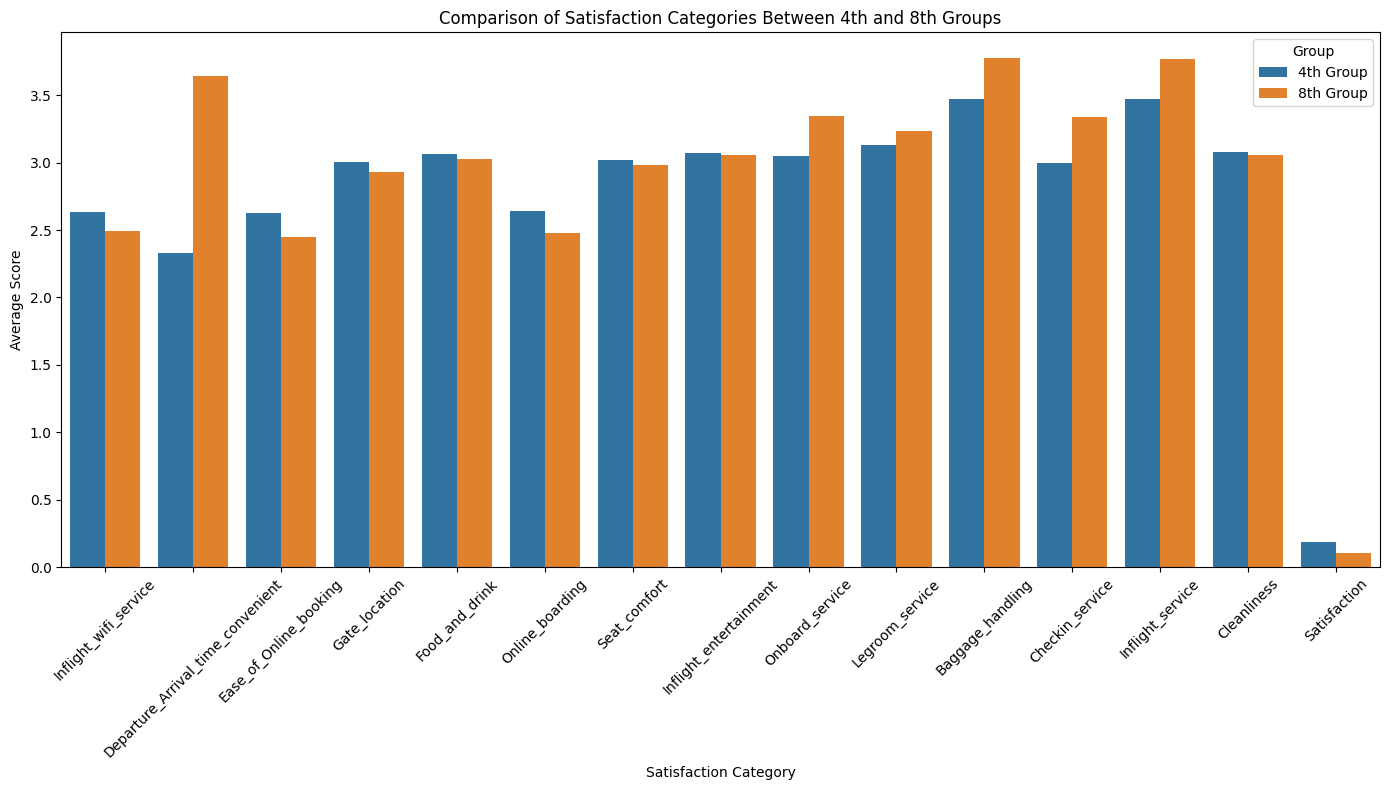

In [ ]:
# 4번째 그룹 필터링
group_4 = top_10_groups.iloc[3]
age_group_4, customer_type_4, travel_type_4, travel_class_4 = group_4[:4]

# 8번째 그룹 필터링
group_8 = top_10_groups.iloc[7]
age_group_8, customer_type_8, travel_type_8, travel_class_8 = group_8[:4]

# 4번째 그룹 데이터 필터링
segment_4 = data[(data['age_group'] == age_group_4) &
                 (data['Customer_Type'] == customer_type_4) &
                 (data['Type_of_Travel'] == travel_type_4) &
                 (data['Class'] == travel_class_4)]

# 8번째 그룹 데이터 필터링
segment_8 = data[(data['age_group'] == age_group_8) &
                 (data['Customer_Type'] == customer_type_8) &
                 (data['Type_of_Travel'] == travel_type_8) &
                 (data['Class'] == travel_class_8)]

# 두 그룹의 만족도 항목 평균 계산
means_4 = segment_4[satisfaction_columns].mean()
means_8 = segment_8[satisfaction_columns].mean()

# 데이터프레임 생성
comparison_df = pd.DataFrame({
    'Satisfaction_Category': satisfaction_columns,
    '4th Group': means_4.values,
    '8th Group': means_8.values
})

# Melt the DataFrame for Seaborn
comparison_df_melted = comparison_df.melt(id_vars='Satisfaction_Category', var_name='Group', value_name='Average_Score')

# 그래프 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_df_melted, x='Satisfaction_Category', y='Average_Score', hue='Group')
plt.title('Comparison of Satisfaction Categories Between 4th and 8th Groups')
plt.xlabel('Satisfaction Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 저장한 파일 내 드라이브로 이동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from google.colab import drive

# 원본 경로
source_path = '/content/customer_segment_plots'

# 목적지 경로
destination_path = '/content/drive/MyDrive/customer_segment2'

# 목적지 경로가 없으면 생성
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# '/content' 경로에 있는 모든 파일과 폴더를 이동
for filename in os.listdir(source_path):
    file_path = os.path.join(source_path, filename)
    if os.path.isfile(file_path) or os.path.isdir(file_path):
        shutil.move(file_path, destination_path)

## (X)모든 경우의 수 고객 그룹 만족도 유형

In [ ]:
# 고객 그룹화 및 크기 계산
grouped = data.groupby(['Gender', 'age_group', 'Customer_Type', 'Type_of_Travel', 'Class']).size().reset_index(name='Count')

# 크기 기준으로 정렬
grouped = grouped.sort_values(by='Count', ascending=False)

# 상위 30개 그룹 출력 (필요에 따라 더 많은 그룹을 출력할 수 있음)
print(grouped.head(30))

# 가능한 모든 조합을 생성
genders = [0, 1]
age_groups = [0, 1, 2, 3, 4, 5]
customer_types = [0, 1]
travel_types = [0, 1]
classes = [0, 1, 2]

# 자동화된 세그먼트 분석
for gender, age_group, customer_type, travel_type, travel_class in product(genders, age_groups, customer_types,
                                                                           travel_types, classes):
    segment = data[(data['Gender'] == gender) &
                   (data['age_group'] == age_group) &
                   (data['Customer_Type'] == customer_type) &
                   (data['Type_of_Travel'] == travel_type) &
                   (data['Class'] == travel_class)]

    if not segment.empty:
        print(
            f'\nSegment - Gender: {gender}, Age Group: {age_group}, Customer Type: {customer_type}, Type of Travel: {travel_type}, Class: {travel_class}')

        # 기초 통계 출력
        print("Descriptive Statistics:")
        print_descriptive_statistics(segment, satisfaction_columns))

        # 상관 관계 출력
        correlation_matrix = segment[satisfaction_columns].corr(method='spearman')
        # print("Correlation Matrix:")
        # print(correlation_matrix)

        # 상관 관계 히트맵 시각화
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title(
            f'Spearman Correlation Matrix for Satisfaction Attributes\nSegment: Gender={gender}, Age Group={age_group}, Customer Type={customer_type}, Type of Travel={travel_type}, Class={travel_class}')
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

## (X)평균 만족도 가장 높은 고객 그룹 10개 상관계수


*   이용객 수가 2명 또는 100명대로 적은 그룹을 보이는 경우도 있음. -> 통계 의미가 있는가..??


In [ ]:
# 고객 정보
customer_columns = ['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']
# 고객 그룹화 및 각 만족도 항목의 평균 계산
grouped = data.groupby(['age_group', 'Customer_Type', 'Type_of_Travel', 'Class'])[satisfaction_columns].mean().reset_index()
print(grouped.head())

# 평균 만족도를 기준으로 정렬
grouped['mean_satisfaction'] = grouped[satisfaction_columns_wo_satisfaction].mean(axis=1)
grouped = grouped.sort_values(by='mean_satisfaction')

# # 평균 만족도가 가장 낮은 상위 10개 그룹
# lowest_groups = grouped.head(10)

# 평균 만족도가 가장 높은 상위 10개 그룹
highest_groups = grouped.tail(10)

# # 결과 출력
# print("Lowest Satisfaction Groups:")
# print(lowest_groups[['age_group', 'Customer_Type', 'Type_of_Travel', 'Class', 'mean_satisfaction']])
print("\nHighest Satisfaction Groups:")
print(highest_groups[[ 'age_group', 'Customer_Type', 'Type_of_Travel', 'Class', 'mean_satisfaction']])

# # 하위 10그룹의 상관 관계 분석 및 시각화
# for i, row in enumerate(lowest_groups.iterrows()):
#     row = row[1]
#     age_group, customer_type, travel_type, travel_class = row[['age_group', 'Customer_Type', 'Type_of_Travel', 'Class']]
#     segment = data[(data['age_group'] == age_group) &
#                    (data['Customer_Type'] == customer_type) &
#                    (data['Type_of_Travel'] == travel_type) &
#                    (data['Class'] == travel_class)]

#     if not segment.empty:
#         print(f'\nLowest {i+1}, Age Group: {age_group_dict[age_group]}, Customer Type: {customer_type_dict[customer_type]}, Type of Travel: {type_of_travel_dict[travel_type]}, Class: {class_dict[travel_class]}')

#         # 기초 통계 출력
#         print_descriptive_statistics(segment, satisfaction_columns)

#         # 상관 관계 출력
#         correlation_matrix = segment[satisfaction_columns].corr(method='spearman')
#         # print("Correlation Matrix:")
#         # print(correlation_matrix)

#         # 상관 관계 히트맵 시각화
#         plt.figure(figsize=(12, 10))
#         sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#         plt.title(f'Spearman Correlation Matrix for Satisfaction Attributes\nLowest {i+1}, Age Group={age_group_dict[age_group]}, Customer Type={customer_type_dict[customer_type]}, Type of Travel={type_of_travel_dict[travel_type]}, Class={class_dict[travel_class]}')
#         plt.show()

# 상위 10그룹의 상관 관계 분석 및 시각화
for i,row in enumerate(highest_groups.iterrows()):
    row = row[1]
    age_group, customer_type, travel_type, travel_class = row[[ 'age_group', 'Customer_Type', 'Type_of_Travel', 'Class']]
    segment = data[(data['age_group'] == age_group) &
                   (data['Customer_Type'] == customer_type) &
                   (data['Type_of_Travel'] == travel_type) &
                   (data['Class'] == travel_class)]

    # if not segment.empty:
    if len(segment)>1:
        print(f'\nHighest {i+1} - Age Group: {age_group_dict[age_group]}, Customer Type: {customer_type_dict[customer_type]}, Type of Travel: {type_of_travel_dict[travel_type]}, Class: {class_dict[travel_class]}')

        # 기초 통계 출력
        print("Descriptive Statistics:")
        print_descriptive_statistics(segment[customer_columns + satisfaction_columns], satisfaction_columns)

        # 상관 관계 출력
        correlation_matrix = segment[customer_columns + satisfaction_columns].corr(method='spearman')
        # print("Correlation Matrix:")
        # print(correlation_matrix)

        # 상관 관계 히트맵 시각화
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title(f'Spearman Correlation Matrix for Satisfaction Attributes\nRANK:{i+1}, Age Group={age_group_dict[age_group]}, Customer Type={customer_type_dict[customer_type]}, Type of Travel={type_of_travel_dict[travel_type]}, Class={class_dict[travel_class]}')
        plt.savefig(os.path.join(output_dir, f'{i+1}_th_group_corr_heatmap(avg_satisfaction).png'))
        plt.show()

Output hidden; open in https://colab.research.google.com to view.